# **Bank Marketing Campaign**

**Tujuan :** Capstone Modul 3

**Dirancang Oleh :** Pradhana Satria - JCDS 2502

***

## **A. Pamahaman Permasalahan Usaha**

### **Konteks**

Sebuah perusahaan yang bergerak di perbangkan ingin meluncurkan kampanye pemasaran berjudul "Bank Marketing Campaign" yang bertujuan untuk meningkatkan pemahaman tentang perilaku nasabah dalam melakukan deposit. Kampanye ini bertujuan untuk mengkasifikasikan nasabah yang melakukan deposit dan yang tidak melakukan deposit. dengan informasi ini, bank berharap dalap mengikatkan strategi pemasarannya untuk menarik lebih banyak nasabah untuk melakukan deposit dan memperkuat hubungan dengan nasabah yang sudah ada.

### **Pernyataan Masalah**

Bank tersebut bertujuan untuk mengoptimalkan kampanye pemasaran "Bank Marketing Campaign" dengan mengklasifikasikan calon deposan dan non-deposan secara akurat. Tantangan utama adalah meminimalkan dua jenis kesalahan kritis:

- False Positive (FP): Di mana kampanye ditargetkan pada nasabah yang pada akhirnya tidak melakukan deposit. Hal ini mengakibatkan pemborosan sumber daya dan upaya pemasaran.

    - FP : Kampanye diberikan, tetapi tidak melakukan deposit

- False Negative (FN): Di mana kampanye gagal menargetkan nasabah yang sebenarnya akan melakukan deposit jika mereka didekati. Hal ini mengakibatkan hilangnya peluang bagi bank untuk memperluas basis deposannya.

    - FN : Kampanye tidak diberikan, tetapi melakukan deposit

Dengan mengidentifikasi kesalahan-kesalahan ini secara akurat, bank dapat memperbaiki strategi pemasarannya untuk memastikan bahwa sumber daya digunakan secara efektif, memaksimalkan return on investment (ROI), dan meningkatkan keberhasilan kampanye secara keseluruhan.

Analisis ini akan membantu bank dalam merancang kegiatan promosi yang lebih efektif dan memberikan layanan yang lebih personal kepada nasabahnya, yang pada akhirnya akan meningkatkan jumlah deposit dan memperkuat hubungan dengan nasabah.

### **Tujuan**

Berdasarkan permasalahan tersebut, bank ingin memiliki kemampuan untuk memprediksi kemungkinan seorang nasabah akan melakukan deposit atau tidak, sehingga kampanye pemasaran dapat difokuskan pada nasabah yang berpotensi melakukan deposit. Bank juga ingin mengidentifikasi faktor-faktor yang mempengaruhi keputusan nasabah untuk melakukan deposit, sehingga dapat merancang strategi pemasaran yang lebih efektif dan personal dalam mendekati nasabah potensial, serta meningkatkan jumlah deposit secara keseluruhan.

### **Pendekatan Analisis**

Tujuan utama kita adalah menganalisis data untuk mengidentifikasi pola yang membedakan nasabah yang berpotensi melakukan deposit dari yang tidak. Proses ini melibatkan pengumpulan dan eksplorasi data, pra-pemrosesan, serta teknik rekayasa fitur untuk memastikan kualitas data yang optimal.

Selanjutnya, kita akan membangun model klasifikasi yang mampu memprediksi probabilitas seorang nasabah akan melakukan deposit atau tidak. Model ini akan menggunakan teknik resampling dan penyesuaian hyperparameter untuk mengatasi ketidakseimbangan data dan meningkatkan akurasi prediksi.

Dengan memanfaatkan hasil analisis ini, bank dapat merancang strategi pemasaran yang lebih efektif dan personal, yang tidak hanya meningkatkan jumlah deposit tetapi juga memperkuat hubungan dengan nasabah. Model prediksi yang dihasilkan akan membantu bank dalam mengoptimalkan alokasi sumber daya pemasaran dan memaksimalkan return on investment (ROI) dengan meminimalkan kesalahan False Positive (FP) dan False Negative (FN).

### **Evaluasi Metrik**

Bank memberikan budget campanye yang difokuskan untuk meningkatkan kemungkinan nasabah melakukan deposit kepada bank. Budget yang di berikan oleh bank dalam melakukan kampanye sebesar $1.300.000 untuk meningkatkan nasabah yang melakukan deposit.

* Asumsi: asumsi ini dilakukan dengan melihat kebanyakan tabungan dari setiap nasabah yang dimiliki pada saat EDA.

* Sumber: https://bankingjournal.aba.com/2023/11/a-bank-marketers-guide-to-justifying-a-budget-increase/ 
    - spada sumber tersebut dijelaskan bahwa setiap bank memiliki rata rata budget untuk "customer accusision cost (CAC)" yang dimana pada penulisan ini di peruntukan untuk kampanye yang menghasilkan kerugian dan kehilangan effisiensi biaya

a. Kesalahan Tipe 1: False Positive

- Spektrum: Diprediksi akan melakukan deposit, tetapi kenyataannya tidak melakukan deposit.

- Konsekuensi: Sumber daya terbuang untuk calon yang tidak melakukan konversi, yang menyebabkan peningkatan biaya kampanye tanpa pengembalian yang sesuai.

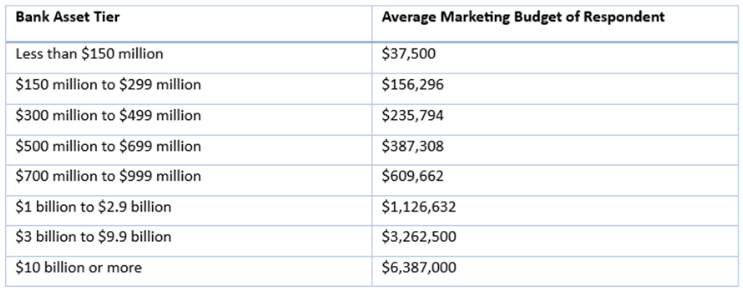

- Kerugian: Berdasarkan budget yang diberikan oleh bank untuk setahun kedapan sebesar $1.126.630 dan ditambah biaya yang terhitung sebesar 10% dan dibulatkan menjadi $1.300.000 dan kampanye diberikan terhadap keseluruhan nasabah yang ada sebanyak 7813 nasabah. Menghasilkan budget per nasabah untuk kampanye sebesar $1.300.000  / 7813 menjadi $166.39 per nasabah

In [1]:
budget        = 1300000
total_nasabah = 7813

FP_Assumption = round((budget/total_nasabah), 2)
print(f'Biaya kampanye per orang sebesar ${FP_Assumption}')

Biaya kampanye per orang sebesar $166.39


b. Kesalahan Tipe 2: Negative Positive

- Spektrum: Diprediksi tidak akan melakukan deposit, tetapi kenyataannya melakukan deposit.

- Konsekuensi: Calon potensial yang sebenarnya akan melakukan konversi terlewatkan, yang mengakibatkan peluang yang hilang dan keberhasilan kampanye yang berkurang.

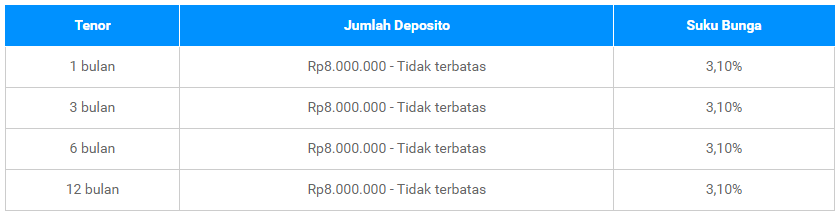

- Kerugian: Berdasarkan salah satu bank ternama di Indonesia, minimal deposit pada bank tersebut adalah Rp.8,000,000.00 yang dikonversikan ke dolar sebesar $16,285 menjadi kerugian per nasabah apabila bank melewati untuk tidak memberikan kampanya ke nasabah tersebut sebesar $491

In [2]:
FN_Assumption = 491

***

## **Memuat dan Pemahaman Dataset**

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.subplots as sp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle

# Set display options
pd.set_option('display.max_columns', None)  # Display all columns, without limits
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output

# Data Handling
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.compose import ColumnTransformer

# Scalers
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# Missing Values Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Imbalance Handling
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Metrics - Classification
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, precision_recall_curve, make_scorer, fbeta_score, average_precision_score, roc_curve

# Optimization
import optuna

# SHAP
import shap

# Importance
from sklearn.inspection import permutation_importance

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.base import BaseEstimator, ClassifierMixin

In [4]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


Sumber Dataset: ---

### **Informasi pada Kolom Data**

| Atribut | Tipe Data | Deskripsi |
| --- | --- | --- |
| age | Interger | Usia nasabah |
| job | Text | Jenis pekerjaan nasabah |
| balance | Interger | Saldo rekening nasabah |
| housing | Text | Pinjaman uang untuk rumah |
| loan | Text | Pinjaman uang |
| contact | Text | Media komunikasi yang digunakan untuk menghubungi nasabah |
| month | Text | Bulan terakhir ketika kontak dilakukan dengan nasabah |
| campaign | Interger | Jumlah total upaya kontak yang dilakukan selama kampanye |
| pdays | Interger | Jumlah hari sejak nasabah terakhir kali dihubungi dalam kampanye sebelumnya |
| poutcome | Text | Hasil dari kampanye pemasaran sebelunya |
| deposit | Text | Nasabah melakukan deposit atau tidak |

### **Proporsi Target**

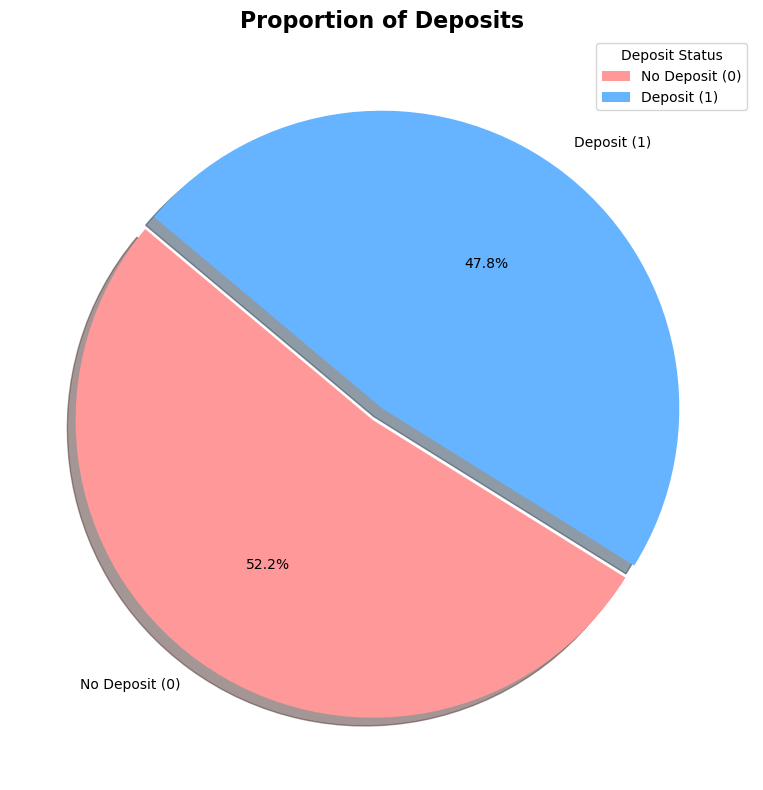

In [5]:
# Calculate the deposit proportions
targetBalance = df['deposit'].value_counts(normalize=True).reset_index()
targetBalance.columns = ['deposit', 'proportion']

# Create a pie chart
plt.figure(figsize=(8, 8))

# Define labels and colors
labels = ['No Deposit (0)', 'Deposit (1)']  # More descriptive labels
colors = ['#ff9999', '#66b3ff']  # Custom colors for better visualization

# Plot the pie chart
plt.pie(
    targetBalance['proportion'], 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    explode=(0.05, 0),  # Slightly "explode" the slices for emphasis
    shadow=True  # Add shadow for a better look
)

# Add a title and legend
plt.title('Proportion of Deposits', fontsize=16, fontweight='bold')
plt.legend(labels, title="Deposit Status", loc="upper right", bbox_to_anchor=(1, 1))

# Ensure the layout is tight and display the plot
plt.tight_layout()
plt.show()

dari proporsi deposit atau target terbilang stabil karena perbedaan antara kedua target klasifikasi hanya berbeda 5 persen, dan proses ini akan berkurang efeknya pada saat penggunaan resampling (None, NearMiss, SMOTE, Random Under Sampling, Random Over Sampling).

***

## **Pengecekan dan Pembersihan Dataset**

In [6]:
# Select numerical columns excluding 'deposit'
num_columns = df.select_dtypes(include='number').columns

# Determine the number of columns (4) and rows (1)
cols, rows = 4, 1

# Create subplots
fig = sp.make_subplots(rows = rows, cols = cols, subplot_titles = num_columns[:cols])

# Iterate over the first four numerical columns and add a box plot to each subplot
for i, col in enumerate(num_columns[:cols]):
    box_fig = px.box(df, y = col)
    fig.add_trace(box_fig['data'][0], row = 1, col = i + 1)

# Update layout to match the theme and appearance of the first plot
fig.update_layout(
    width = 1000,
    height = 650,
    showlegend = False,
    title_text = 'Boxplots of Numerical Columns',
    title_font_size = 16,
    font = dict(size = 10)
)

fig.show()

data outliers yang terdapat pada dataset ini masih dapat digunakan dikarenakan tidak ada outlier yang sangat extreme atau tidak bisa diterima. oleh karena itu tidak ada outliers yang di hilangkan dan hanya akan di kurangi efek dari outliers tersebut pada saat melakukan preprocessing.

### **Pembersihan Data**

In [7]:
display('Missing Value', df.isna().sum())
display('Duplicated Data', df.duplicated().sum())

'Missing Value'

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

'Duplicated Data'

np.int64(8)

hapus `duplicate`

Tidak ada data kosong, akan tetapi terdapat 8 buah data duplicate. untuk data duplicate akan di hapus keseluruhannya.

In [8]:
# drop the duplicated data from bank campaign dataset
df.drop_duplicates(inplace = True)

**kolom** `poutcome`

In [9]:
df['poutcome'].value_counts()

poutcome
unknown    5811
failure     848
success     761
other       385
Name: count, dtype: int64

In [10]:
# Chekcing balance
dataCheck_1 = (
        df.groupby([df['pdays'].apply(lambda x: 'Below' if x < 0 else 'Above'), 'poutcome','deposit'])
        [['deposit']].count()
)
dataCheck_1

deposit
pdays poutcome deposit         
Above failure  no           413
               yes          435
      other    no           159
               yes          226
      success  no            65
               yes          696
      unknown  yes            2
Below unknown  no          3438
               yes         2371

pada feature `poutcome` setelah di analisa terdapat 'unknown' yang dimana berhubungan dengan pdays, akan tetapi terdapat 2 data 'unknown'. data 'unknown' di feature `poutcome` yang memiliki `pdays` dibawah 0 memiliki arti bahwa nasabah tersebut belum mendapatkan campaign terakhir. Oleh kareanya data yang tidak sesuai tersebut akan di hapus karena tidak sesuai dengan maknanya. Teruntuk 'other' pada feature `poutcome` tidak memiliki arti yang signifikan (success and failure no in between), dengan itu data tersebut akan di buat sebagai `missing value` agar dapat di isi pada saat `preprocessing`.

In [11]:
# Update the 'poutcome' column based on the specified conditions
df.loc[(df['poutcome'] == 'unknown') & (df['pdays'] > 0) & (df['deposit'] == 1), 'poutcome'] = 'success'

# Replace 'other' with np.nan in the 'poutcome' column
df['poutcome'].replace('other', np.nan, inplace=True)

**kolom** `job`

In [12]:
df['job'].value_counts()

job
management       1789
blue-collar      1343
technician       1289
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
Name: count, dtype: int64

Dikarenakan proporsi 'unknown' pada `job` relatif kecil, data tersbut akan diubah menjadi `missing value` agar dapat di isi pada saat preprocessing

In [13]:
df['job'].replace('unknown', np.nan, inplace=True)

***

## **Analisis Data Eksploratif (EDA)**

### **Penambahan Fitur Khusus Untuk EDA**

In [14]:
df_EDA = df.copy()

# Apply balance segmentation using lambda function
df_EDA['balance_segmentation'] = df_EDA['balance'].apply(
                                    lambda x: 'Low' if x < 0 
                                        else 'Mid' if 0 < x < 33326 
                                        else 'Top'
                            )

# Age segmentation using lambda function
df_EDA['age_segmentation'] = df_EDA['age'].apply(
                                lambda x: 'Young Adults' if 18 <= x <= 25 
                                    else 'Adults' if 26 <= x <= 35 
                                    else 'Middle-Aged Adults' if 36 <= x <= 55 
                                    else 'Seniors'
                        )

# Display the first few rows of the DataFrame to verify the new features
df_EDA.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,balance_segmentation,age_segmentation
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes,Mid,Middle-Aged Adults
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes,Low,Middle-Aged Adults
2,51,admin.,3025,no,no,cellular,may,1,352,NaN,yes,Mid,Middle-Aged Adults
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no,Low,Middle-Aged Adults
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no,Mid,Middle-Aged Adults


In [15]:
# Group by balance segmentation and deposit
df_balance_grouped = df_EDA.groupby(['balance_segmentation', 'deposit']).size().reset_index(name = 'count')

# Group by age segmentation and deposit
df_age_grouped = df_EDA.groupby(['age_segmentation', 'deposit']).size().reset_index(name = 'count')

# Corrected bar order
order = ['Young Adults', 'Adults', 'Middle-Aged Adults', 'Seniors']

# Ensure the order is applied to the age segmentation
df_age_grouped['age_segmentation'] = pd.Categorical(df_age_grouped['age_segmentation'], categories = order, ordered = True)

# Create balance segmentation chart
fig_balance = px.bar(df_balance_grouped, x = 'balance_segmentation', y = 'count', color = 'deposit', title = 'Balance Segmentation Proportion', text = 'count')

# Create age segmentation chart with specified order
fig_age = px.bar(df_age_grouped, x='age_segmentation', y = 'count', color = 'deposit', title = 'Age Segmentation Proportion', text = 'count')

# Create a subplot with 1 row and 2 columns
fig = sp.make_subplots(rows = 1, cols = 2, subplot_titles = ("Balance Segmentation Proportion", "Age Segmentation Proportion"))

# Add the balance segmentation chart to the first column
for trace in fig_balance['data']:
    fig.add_trace(trace, row = 1, col = 1)

# Add the age segmentation chart to the second column
for trace in fig_age['data']:
    fig.add_trace(trace, row = 1, col = 2)

# Update layout to place charts side by side and set canvas size
fig.update_layout(
    title_text      = 'Segmentation Proportion Charts',
    title_font_size = 16,
    showlegend      = True,
    width           = 1650,  # Set the width of the canvas
    height          = 650    # Set the height of the canvas
)

fig.show()

Insight:

Segmen "Middle-Aged Adults" memiliki jumlah "balance" tertinggi, sedangkan "Young Adults" have the lowest. Representasi visual ini membantu memahami hubungan segmentasi dari nasabah yang dimiliki. Dengan grafik ini, bank dapat menyesuaikan strategi untuk menargetkan kelompok usia dan balance tertentu dengan lebih efektif, meningkatkan keterlibatan dan tingkat setoran secara keseluruhan.

* notes:
dari data ini, kita mengasumsikan bahwa bank ini merupakan bank berkelas middle.

In [16]:
# Define the order for the months
order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Create a bar plot using Plotly Express
fig = px.bar(df_EDA, 
             x='month', 
             y='campaign', 
             category_orders={'month': order},  # order the bars
             title='Monthly Campaign')

# Update the layout to set the figure size
fig.update_layout(
    width=800,  # width in pixels
    height=600,  # height in pixels
    title={'font': {'size': 16}},
    xaxis_title='Month',
    yaxis_title='Campaign',
    xaxis={'categoryorder': 'array', 'categoryarray': order}
)

# Show the plot
fig.show()

Insight :

Campaign terbanyak dibagikan pada bulan mei dan agustus, dan paling sedikit pada bulan desember.

***

## **Persiapan Data**

Dalam bagian ini, kita akan melakukan persiapan data sebelum memulai proses pemodelan. Persiapan data meliputi beberapa langkah penting seperti pengkodean variabel kategorikal, penanganan nilai yang hilang, skala fitur numerik, dan pembuatan fitur baru. Variabel kategorikal dikodekan menggunakan One-Hot Encoding dan Ordinal Encoding. Nilai yang hilang diisi menggunakan Simple Imputer dan Iterative Imputer. Fitur numerik diskalakan menggunakan Robust Scaler untuk mengurangi pengaruh outlier. Fitur baru seperti last_campaign dan avg_balance_age_segment dibuat untuk meningkatkan kinerja model. Setelah itu, data dibagi menjadi variabel independen (X) dan variabel dependen (y), kemudian dibagi lagi menjadi data latih dan data uji dengan proporsi 85% dan 15%.

### **Perubahan Target**

perubahan pada target dari yes dan no menjadi 1 dan 0

In [17]:
df['deposit'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,NaN,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0


### **Penentuan Random Seed**

In [18]:
# Set random seed for reproducibility
RANDOM_SEED = 0

### **Penambahan Fitur**

Fitur last_campaign dibuat berdasarkan nilai pdays untuk menunjukkan apakah nasabah mendapatkan kampanye terakhir atau tidak.
Fitur avg_balance_age_segment dibuat untuk menunjukkan rata-rata saldo rekening berdasarkan segmentasi umur nasabah.

`last_campaign`

penambahan fitur berupa penjelasan bahwa apakah nasabah mendapatkan campaign terakhir

In [19]:
# Columns of last_capaign
df['last_campaign'] = df['pdays'].apply(lambda x: 'yes' if x < 0 else 'no')

`avg_balace_age_segment`

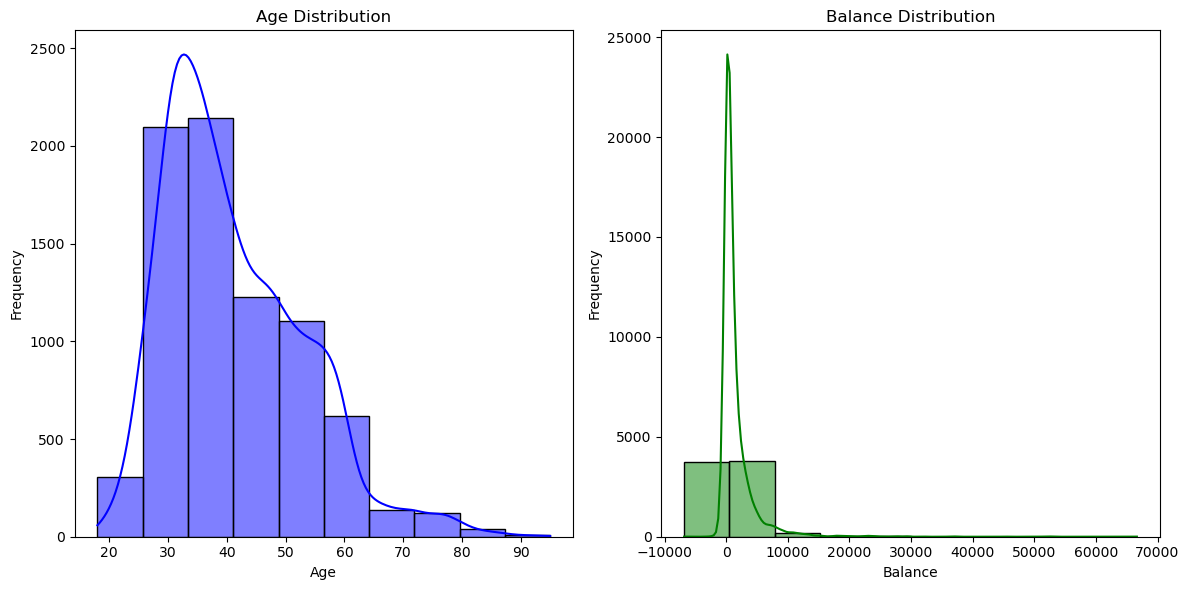

In [20]:
# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for Age
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=10, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for Balance
plt.subplot(1, 2, 2)
sns.histplot(df['balance'], bins=10, kde=True, color='green')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

fitur yang menjelaskan rata rata tabungan dari setiap segmentasi umur yang dimana umur dibagi menjadi 4 segmentasi berupa:
- Segment 1
- Segment 2
- Segment 3
- Segment 4

In [21]:
# Segment the age column into four segments
df['age_segment'] = pd.qcut(df['age'], q=4, labels=['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'])

# Calculate the average balance for each age segment
average_balance_per_segment = df.groupby('age_segment')['balance'].mean().reset_index()
average_balance_per_segment.columns = ['age_segment', 'avg_balance_age_segment']

# Merge the average balance back to the original DataFrame
df = df.merge(average_balance_per_segment, on='age_segment', how='left')

# Drop the age_segment column if it's no longer needed
df.drop(columns=['age_segment'], inplace=True)

*~~~ Showing Result ~~~*

In [22]:
# Display the first few rows of the DataFrame to verify the new feature
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,last_campaign,avg_balance_age_segment
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1,yes,2020.442711
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1,yes,1363.777177
2,51,admin.,3025,no,no,cellular,may,1,352,NaN,1,no,2020.442711
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0,yes,1363.777177
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0,yes,1363.777177


In [23]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns:
    listItem.append([col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns = ['Columns Name', 'Number of Unique', 'Unique Sample'], data = listItem)

tabel1Desc

,Columns Name,Number of Unique,Unique Sample
0,age,75,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 92, 93, 95]"
1,job,11,"[admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, nan]"
2,balance,3153,"[-6847, -3058, -2282, -1965, -1944, -1701, -1636, -1531, -1489, -1451, -1415, -1386, -1206, -1139, -1053, -1050, -1042, -994, -974, -972, -971, -970, -938, -934, -930, -888, -887, -861, -849, -839, -825, -824, -813, -811, -805, -799, -782, -770, -762, -754, -752, -745, -722, -713, -701, -700, -675, -671, -666, -663, -639, -637, -636, -634, -633, -616, -614, -613, -601, -600, -588, -581, -575, -565, -558, -556, -553, -547, -546, -538, -529, -522, -516, -509, -508, -505, -504, -498, -497, -496, -493, -492, -491, -487, -479, -475, -473, -470, -468, -467, -466, -463, -462, -461, -456, -454, -451, -449, -448, -444, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[apr, aug, dec, feb, jan, jul, jun, mar, may, nov, oct, sep]"
7,campaign,32,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 33, 43, 63]"
8,pdays,422,"[-1, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 17, 20, 21, 24, 28, 29, 31, 33, 34, 35, 36, 37, 38, 40, 41, 43, 44, 48, 50, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, ...]"
9,poutcome,3,"[failure, success, unknown, nan]"


In [24]:
# Save the cleaned dataset before defining X and y
df.to_csv('modified_bank_marketing_campaign.csv', index = False)

# Verify the saved file
saved_df = pd.read_csv('modified_bank_marketing_campaign.csv')
saved_df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,last_campaign,avg_balance_age_segment
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1,yes,2020.442711
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1,yes,1363.777177
2,51,admin.,3025,no,no,cellular,may,1,352,NaN,1,no,2020.442711
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0,yes,1363.777177
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0,yes,1363.777177


### **Mendefiniskan X dan y**

Variabel deposit digunakan sebagai target (y), sedangkan fitur lainnya digunakan sebagai prediktor (X).

In [25]:
# X and y
X = df.drop(columns = 'deposit')
y = df['deposit']

# Show
display('X (head - 5)', X.head(), 'y (head - 5)', y.head())

'X (head - 5)'

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,last_campaign,avg_balance_age_segment
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes,2020.442711
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes,1363.777177
2,51,admin.,3025,no,no,cellular,may,1,352,NaN,no,2020.442711
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,yes,1363.777177
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,yes,1363.777177


'y (head - 5)'

0    1
1    1
2    1
3    0
4    0
Name: deposit, dtype: int64

### **Pembagian Data pada X dan y**

Data dibagi menjadi data latih (training) dan data uji (testing) dengan proporsi 85% untuk data latih dan 15% untuk data uji secara stratified untuk memastikan distribusi target yang seimbang di kedua set data.

In [26]:
# Train and Test
X_train, X_test, y_train, y_test = train_test_split(
                                                X, y,
                                                test_size = 0.15,
                                                random_state = RANDOM_SEED,
                                                stratify = y
                                )

# Create a list of tuples with labels and data
trainTestXy = [
    ('X_train', X_train),
    ('X_test', X_test),
    ('y_train', y_train),
    ('y_test', y_test)
]

# Display data with labels
for label, data in trainTestXy:
    print(f'{label}:')
    display(data.head())


X_train:


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,last_campaign,avg_balance_age_segment
305,34,blue-collar,800,no,no,cellular,apr,1,-1,unknown,yes,1363.777177
367,29,technician,940,yes,no,cellular,may,1,330,failure,no,1267.088729
1071,29,management,1441,yes,no,cellular,feb,2,-1,unknown,yes,1267.088729
5562,53,management,1624,no,no,cellular,nov,3,97,success,no,2020.442711
2452,27,technician,931,yes,no,cellular,feb,1,-1,unknown,yes,1267.088729


X_test:


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,last_campaign,avg_balance_age_segment
2105,49,admin.,7426,no,no,telephone,nov,2,-1,unknown,yes,1447.527352
2067,31,technician,2807,no,no,unknown,nov,1,-1,unknown,yes,1267.088729
6036,27,management,0,no,yes,cellular,jul,1,-1,unknown,yes,1267.088729
6676,45,admin.,205,no,no,cellular,aug,1,92,success,no,1447.527352
2005,25,technician,325,no,no,cellular,oct,3,-1,unknown,yes,1267.088729


y_train:


305     1
367     0
1071    1
5562    1
2452    1
Name: deposit, dtype: int64

y_test:


2105    0
2067    1
6036    0
6676    1
2005    1
Name: deposit, dtype: int64

### **Pipeline Pra-Pemprosesan Data: Imputasi, Pengkodean, dan Skalasi**

Hasil akhir kolom dari dataset yang digunakan berupa

In [27]:
df.head(1)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,last_campaign,avg_balance_age_segment
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1,yes,2020.442711


Pada pra-proses dilakukan dengan cara:

- Variabel kategorikal seperti contact, poutcome, job, month, dan last_campaign dikodekan menggunakan One-Hot Encoding.
- Variabel biner seperti housing dan loan dikodekan menggunakan Ordinal Encoding.
- Fitur numerik seperti age, balance, campaign, pdays, dan avg_balance_age_segment diskalakan menggunakan Robust Scaler untuk mengurangi pengaruh outlier.

In [28]:
# Define the transformer with imputation, encoding, and scaling steps
transformer = ColumnTransformer([
    # Iterative Imputation for categorical features and One-Hot Encoding
    ('impute_onehot', Pipeline(steps = [
        ('imputer', SimpleImputer(strategy = 'most_frequent')),  # Use Simple Imputer for categorical data
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]), ['contact', 'poutcome', 'job', 'month', 'last_campaign']),
    
    # Imputation and Binary Encoding for yes/no categorical features
    ('impute_binary', Pipeline(steps = [
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ('binary', OrdinalEncoder())
    ]), ['housing', 'loan']),
    
    # Robust Scaling for numerical features
    ('robust', RobustScaler(), ['age', 'balance', 'campaign', 'pdays', 'avg_balance_age_segment']),
    
    # Iterative Imputation for numerical features
    ('iterative', IterativeImputer(max_iter = 10, random_state = RANDOM_SEED), ['age', 'balance'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_onehot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['contact', 'poutcome', 'job', 'month',
                                  'last_campaign']),
                                ('impute_binary',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('binary', OrdinalEncoder())]),
                                 ['housing', 'loan']),
                                ('robust', RobustScaler(),
                                 ['age', 'balance', 'campaign', 'pdays',
                                  'avg_balance_age_segment']),
                                ('iterative', IterativeImputer(random_state=0),
                                 ['age', 'balance'])])

### **Perhitungan Skor**

Dalam bagian ini, kita akan menentukan metrik evaluasi yang digunakan untuk mengukur kinerja model. Metrik evaluasi yang digunakan adalah recall, precision, F2-score, dan F3-score. Recall mengukur kemampuan model dalam mendeteksi semua kasus positif, precision mengukur akurasi dari prediksi positif yang dibuat oleh model, sedangkan F2-score dan F3-score adalah metrik yang menggabungkan recall dan precision dengan memberikan bobot lebih pada recall. Metrik-metrik ini penting untuk memastikan bahwa model tidak hanya akurat tetapi juga efektif dalam mendeteksi kasus positif yang penting dalam konteks kampanye pemasaran bank.

In [29]:
# F2 Scoring
f2_scorer = make_scorer(fbeta_score, beta = 2)

# F3 Scoring
f3_scorer = make_scorer(fbeta_score, beta = 3)

# Scoring Function
scoring_functions = {
    'recall': 'recall',
    'f2'    : make_scorer(fbeta_score, beta = 2),
    'f3'    : make_scorer(fbeta_score, beta = 3)
}

# Score calculation
score_metrics = {
    'recall': recall_score,
    'precision': precision_score,
    'f2': lambda y_true, y_pred: fbeta_score(y_true, y_pred, beta = 2),
    'f3': lambda y_true, y_pred: fbeta_score(y_true, y_pred, beta = 3)
}

**Scoring:**

- Recall: Mengukur kemampuan model dalam mendeteksi semua kasus positif.
- Precision: Mengukur akurasi dari prediksi positif yang dibuat oleh model.
- F2-score: Kombinasi dari recall dan precision dengan bobot lebih pada recall.
- F3-score: Kombinasi dari recall dan precision dengan bobot lebih pada recall.

### **pemodelan**

Pada tahap pemodelan, kita akan membangun dan melatih model machine learning untuk memprediksi apakah nasabah akan melakukan deposit atau tidak.

In [30]:
# Logistic Regression
logRegression = LogisticRegression(random_state = RANDOM_SEED)

# KNeighbors
knnClass = KNeighborsClassifier()

# Decision Tree
decTree = DecisionTreeClassifier(random_state = RANDOM_SEED)

# Voting Classifier
votingClass = VotingClassifier(
    estimators = [
        ('logreg', logRegression), 
        ('knn', knnClass), 
        ('tree', decTree)
    ],
    voting='soft'  # Voting strategy: 'hard' or 'soft'
)

# Stacking Classifier
stackingClass = StackingClassifier(
    estimators = [
        ('logreg', logRegression), 
        ('knn', knnClass), 
        ('tree', decTree)
    ]
)

# RandomForest
randForest = RandomForestClassifier(random_state = RANDOM_SEED)

# AdaBoost
adaBoost = AdaBoostClassifier(random_state = RANDOM_SEED)

# GradientBoosting
gradBoost = GradientBoostingClassifier(random_state = RANDOM_SEED)

# XGBoost
xgBoost = XGBClassifier(random_state = RANDOM_SEED, use_label_encoder = False, eval_metric = 'logloss')

# Define models for tuning
models = {
    'RandomForest': RandomForestClassifier(random_state=RANDOM_SEED),
    'AdaBoost': AdaBoostClassifier(random_state=RANDOM_SEED),
    'GradientBoosting': GradientBoostingClassifier(random_state=RANDOM_SEED),
    'XGBoost': XGBClassifier(random_state=RANDOM_SEED),
    'LogisticRegression': LogisticRegression(random_state=RANDOM_SEED),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=RANDOM_SEED),
    'Voting': VotingClassifier(estimators=[
        ('logreg', LogisticRegression(random_state=RANDOM_SEED)), 
        ('knn', KNeighborsClassifier()), 
        ('tree', DecisionTreeClassifier(random_state=RANDOM_SEED))
    ], voting='soft'),

    # Stacking Classifier
    'Stacking': StackingClassifier(estimators=[
        ('logreg', LogisticRegression(random_state=RANDOM_SEED)), 
        ('knn', KNeighborsClassifier()), 
        ('tree', DecisionTreeClassifier(random_state=RANDOM_SEED))],
        final_estimator=LogisticRegression(),
        cv=5
    )
}

# Make a list of model for benchmark
list_model = [randForest, adaBoost, gradBoost, xgBoost, logRegression, knnClass, decTree, votingClass, stackingClass]
model_names = ['RandomForest', 'AdaBoost', 'GradientBoost', 'XGBOOST', 'LogisticRegression', 'KNN', 'DecisionTree', 'Voting', 'Stacking']

### **Resampling Data**

Penyeimbangan data adalah langkah penting dalam pemodelan machine learning, terutama ketika kita memiliki dataset yang tidak seimbang, di mana jumlah kelas positif dan negatif sangat berbeda. Dalam konteks ini, kita menggunakan teknik resampling untuk menyeimbangkan data. Teknik yang digunakan termasuk oversampling kelas minoritas (positif) dan undersampling kelas mayoritas (negatif). Dengan menyeimbangkan data, kita memastikan bahwa model tidak bias terhadap kelas mayoritas dan memiliki kinerja yang baik dalam mendeteksi kelas minoritas. Penyeimbangan data membantu meningkatkan metrik evaluasi seperti recall dan precision, yang penting untuk tugas klasifikasi yang tidak seimbang.

In [31]:
# Resampling Methods
resampling_methods = {
    'None'                 : None,
    'SMOTE'                : SMOTE(sampling_strategy = 'minority', random_state = RANDOM_SEED),
    'NearMiss'             : NearMiss(sampling_strategy = 'majority'),
    'RUS'                  : RandomUnderSampler(random_state = RANDOM_SEED),
    'ROS'                  : RandomOverSampler(random_state = RANDOM_SEED),
}

rus = RandomUnderSampler(random_state = RANDOM_SEED)
ros = RandomOverSampler(random_state = RANDOM_SEED)
NearMiss  = NearMiss(sampling_strategy = 'majority')
SMOTE = SMOTE(sampling_strategy = 'minority', random_state = RANDOM_SEED)

**Resampling Data:**

- Oversampling: 

    Menambah jumlah sampel pada kelas minoritas (positif).

- Undersampling: 

    Mengurangi jumlah sampel pada kelas mayoritas (negatif).

- SMOTE (Synthetic Minority Over-sampling Technique): 

    SMOTE membuat contoh sintetis dari kelas minoritas dengan interpolasi antara instance yang dipilih dan tetangganya. Ini membantu model memiliki lebih banyak contoh dari kelas minoritas untuk dipelajari.

- NearMiss: 

    NearMiss adalah teknik undersampling yang digunakan untuk menangani ketidakseimbangan kelas dalam dataset. Metode ini bertujuan untuk mengurangi jumlah sampel dari kelas mayoritas agar lebih seimbang dengan kelas minoritas. NearMiss bekerja dengan memilih contoh dari kelas mayoritas berdasarkan jarak rata-rata mereka ke kelas minoritas. Teknik ini berguna dalam meningkatkan performa model, terutama dalam mendeteksi kelas minoritas yang sering diabaikan oleh model karena ketidakseimbangan data.

Dengan menggunakan SMOTE dan NearMiss, kita dapat menyeimbangkan data dan meningkatkan kinerja model dalam mendeteksi kelas minoritas. Penyeimbangan data juga membantu meningkatkan metrik evaluasi seperti recall dan precision, yang penting untuk tugas klasifikasi yang tidak seimbang.

***

## **Benchmark**

### **1. Benchmark**

#### **Benchmark tanpa Resampling**

In [32]:
list_model = [randForest, adaBoost, gradBoost, xgBoost, logRegression, knnClass, decTree, votingClass, stackingClass]
model_names = ['RandomForest', 'AdaBoost', 'Gradient', 'XGBoost', 'LogisticRegression', 'KNN', 'DecisionTree', 'Voting', 'Stacking']

# Initialize results dictionary
results = {'model': model_names, 'recall': [], 'f2': [], 'f3': []}

# Use StratifiedKFold for cross-validation
strat_kf = StratifiedKFold(n_splits = 5)

# Scoring loop
for score_name, scorer in scoring_functions.items():
    for i, model in enumerate(list_model):
        pipe_prep_model = Pipeline([('preprocessing', transformer), ('modeling', model)])
        crossval = cross_val_score(pipe_prep_model, X_train, y_train, cv = strat_kf, scoring = scorer)
        results[score_name].append((crossval.round(2), crossval.mean(), crossval.std()))

# Create DataFrames for each score
df_scores = {score_name: pd.DataFrame({
    'model': model_names,
    'score': [score[0] for score in results[score_name]],
    'mean_score': [score[1] for score in results[score_name]],
    'std_score': [score[2] for score in results[score_name]]
}).sort_values(by='mean_score', ascending=False) for score_name in scoring_functions}

# Display results
for score_name, df in df_scores.items():
    print(f"\n{score_name.upper()} Scores:")
    display(df.head(3))

# Identify the best overall model by comparing the highest mean scores across all scoring functions
best_model_name_noSampling = None
best_overall_score_name = None
best_overall_mean_score = -float('inf')

for score_name, df in df_scores.items():
    if df.iloc[0]['mean_score'] > best_overall_mean_score:
        best_overall_mean_score     = df.iloc[0]['mean_score']
        best_model_name_noSampling  = df.iloc[0]['model']
        best_overall_score_name     = score_name

print(f'Model terbaik : {best_model_name_noSampling} dengan menggunakan perhitungan skor tertinggi pada {best_overall_score_name.upper()}')



RECALL Scores:


,model,score,mean_score,std_score
4,LogisticRegression,"[0.7, 0.64, 0.66, 0.68, 0.6]",0.656782,0.033661
8,Stacking,"[0.68, 0.62, 0.64, 0.66, 0.58]",0.637224,0.035085
0,RandomForest,"[0.65, 0.62, 0.67, 0.63, 0.6]",0.634385,0.022360



F2 Scores:


,model,score,mean_score,std_score
4,LogisticRegression,"[0.69, 0.65, 0.66, 0.68, 0.61]",0.657349,0.027460
0,RandomForest,"[0.66, 0.64, 0.68, 0.65, 0.62]",0.650083,0.019767
8,Stacking,"[0.68, 0.64, 0.64, 0.67, 0.6]",0.645909,0.029360



F3 Scores:


,model,score,mean_score,std_score
4,LogisticRegression,"[0.7, 0.65, 0.66, 0.68, 0.61]",0.657049,0.030557
0,RandomForest,"[0.66, 0.63, 0.67, 0.64, 0.61]",0.642133,0.021087
8,Stacking,"[0.68, 0.63, 0.64, 0.67, 0.59]",0.641520,0.032248


Model terbaik : LogisticRegression dengan menggunakan perhitungan skor tertinggi pada F2


In [33]:
best_model = list_model[model_names.index(best_model_name_noSampling)]

# Define and fit the pipeline using the best model
pipe_prep_model = Pipeline([
    ("preprocessing", transformer),
    ("modeling", best_model)
])

pipe_prep_model.fit(X_train, y_train)

# Predict
y_pred_modelNonSampling = pipe_prep_model.predict(X_test)

# Calculate scores
if best_overall_score_name == 'recall':
    best_score = recall_score(y_test, y_pred_modelNonSampling)
elif best_overall_score_name == 'f2':
    best_score = fbeta_score(y_test, y_pred_modelNonSampling, beta = 2)
else:  # 'f3'
    best_score = fbeta_score(y_test, y_pred_modelNonSampling, beta = 3)

print(f'''Score tanpa resampling :\n
{best_overall_score_name.upper()} Prediksi skor menggunakan({best_model_name_noSampling})= {round(best_score, 4)} ({round(best_score * 100, 2)} %)''')

Score tanpa resampling :

F2 Prediksi skor menggunakan(LogisticRegression)= 0.6555 (65.55 %)


Dengan menggunakan Logistic Regression tanpa resampling, hasil F2 prediksi skornya adalah 0.6555 atau 65.55%. Ini menunjukkan kinerja model dalam mendeteksi kelas positif dan negatif dengan mempertimbangkan keseimbangan antara precision dan recall.

#### **Logistic Regression**

Logistic Regression adalah algoritma yang digunakan untuk klasifikasi biner, yaitu memprediksi apakah suatu sampel termasuk dalam kelas positif atau negatif berdasarkan atribut yang ada. Algoritma ini menggunakan fungsi logistik atau sigmoid untuk menghasilkan nilai probabilitas yang kemudian digunakan untuk melakukan prediksi.

#### **F2 Score**

- F2 Score adalah metrik evaluasi yang digunakan untuk mengukur keseimbangan antara precision dan recall, dengan penekanan lebih besar pada recall. F2 Score dihitung dengan rumus:



- Dalam konteks ini, F2 Score memberikan bobot lebih pada recall, yang sangat penting ketika kita ingin meminimalkan jumlah false negatives, yaitu kesalahan dalam mengidentifikasi kelas positif.

### **2. Resampling**

Penyeimbangan data adalah langkah penting dalam pemodelan machine learning, terutama ketika kita memiliki dataset yang tidak seimbang, di mana jumlah kelas positif dan negatif sangat berbeda. Dalam konteks kampanye pemasaran bank, kita ingin memastikan bahwa model dapat mendeteksi nasabah yang akan melakukan deposit (kelas positif) dengan baik, meskipun jumlah nasabah yang tidak melakukan deposit (kelas negatif) jauh lebih banyak.

#### **Benchmark Menggunakan Resampling**

- Identifikasi Ketidak seimbangan: Langkah pertama adalah mengidentifikasi ketidakseimbangan dalam dataset dengan menghitung jumlah sampel pada setiap kelas.

- Penerapan Teknik Resampling: Setelah ketidakseimbangan teridentifikasi, teknik resampling seperti SMOTE dan Random Under-sampling diterapkan untuk menyeimbangkan dataset.

- Evaluasi Kinerja Model: Setelah dataset seimbang, model machine learning dilatih dan dievaluasi menggunakan dataset yang telah diresampling. Metrik evaluasi seperti recall dan precision digunakan untuk mengukur kinerja model.

In [34]:
# List to store all dataframes and best scores
list_all_df = []
best_scores = []

# Loop through each resampling method
for resample_name, resample_method in resampling_methods.items():
    # Initialize lists to store mean and std of scores for recall, F2, and F3
    list_mean_score_recall, list_std_score_recall = [], []
    list_mean_score_f2, list_std_score_f2 = [], []
    list_mean_score_f3, list_std_score_f3 = [], []

    # Loop through each model
    for model in list_model:
        # Create pipeline with preprocessing, resampling, and modeling steps
        pipe_prep_model = imbPipeline([
            ('preprocessing', transformer),   # Data preprocessing step
            ('resampling', resample_method),  # Resampling method
            ('modeling', model),              # Model
        ])

        # Perform cross-validation and calculate recall, F2, and F3 scores
        scores_recall = cross_val_score(pipe_prep_model, X_train, y_train, cv = 5, scoring = 'recall')
        scores_f2 = cross_val_score(pipe_prep_model, X_train, y_train, cv = 5, scoring = f2_scorer)
        scores_f3 = cross_val_score(pipe_prep_model, X_train, y_train, cv = 5, scoring = f3_scorer)

        # Append mean and std scores to respective lists
        list_mean_score_recall.append(scores_recall.mean())
        list_std_score_recall.append(scores_recall.std())

        list_mean_score_f2.append(scores_f2.mean())
        list_std_score_f2.append(scores_f2.std())

        list_mean_score_f3.append(scores_f3.mean())
        list_std_score_f3.append(scores_f3.std())

    # Create a dataframe to store the scores for the current resampling method and models
    df_scores = pd.DataFrame({
        'model': model_names,
        'mean_score_recall': list_mean_score_recall,
        'std_score_recall': list_std_score_recall,
        'mean_score_f2': list_mean_score_f2,
        'std_score_f2': list_std_score_f2,
        'mean_score_f3': list_mean_score_f3,
        'std_score_f3': list_std_score_f3
    })

    # Determine the highest mean score among recall, F2, and F3 for each model
    df_scores['highest_mean'] = df_scores[['mean_score_recall', 'mean_score_f2', 'mean_score_f3']].max(axis=1)
    df_scores['highest_mean_metric'] = df_scores[['mean_score_recall', 'mean_score_f2', 'mean_score_f3']].idxmax(axis=1)
    df_scores = df_scores.sort_values(by='highest_mean', ascending=False)

    # Store the best score for the current resampling method
    best_scores.append({
        'method': resample_name,
        'model': df_scores.iloc[0]['model'],
        'highest_mean': df_scores.iloc[0]['highest_mean'],
        'metric': df_scores.iloc[0]['highest_mean_metric']
    })

    # Append the dataframe to the list
    list_all_df.append((resample_name, df_scores))

# Create a dataframe of the best scores for each resampling method
df_best_scores = pd.DataFrame(best_scores).sort_values(by='highest_mean', ascending=False)

# Determine the overall best model and resampling method
best_model_name_withSampling = df_best_scores.iloc[0]['model']
best_resampling_method = df_best_scores.iloc[0]['method']
best_metric = df_best_scores.iloc[0]['metric']

# Display the top scores for each resampling method
for resample_name, df_scores in list_all_df:
    print(f'Metode Resampling: {resample_name}')
    display(df_scores.head(3))
    print('\n')

# Display the best scores overall
print('Skor terbaik:')
display(df_best_scores.head(3))

# Print the overall best model, resampling method, and metric
print(f'\nModel terbaik: {best_model_name_withSampling} with {best_resampling_method}, skor tertinggi pada: {best_metric}')

Metode Resampling: None


,model,mean_score_recall,std_score_recall,mean_score_f2,std_score_f2,mean_score_f3,std_score_f3,highest_mean,highest_mean_metric
4,LogisticRegression,0.656782,0.033661,0.657349,0.027460,0.657049,0.030557,0.657349,mean_score_f2
0,RandomForest,0.634385,0.022360,0.650083,0.019767,0.642133,0.021087,0.650083,mean_score_f2
8,Stacking,0.637224,0.035085,0.645909,0.029360,0.641520,0.032248,0.645909,mean_score_f2




Metode Resampling: SMOTE


,model,mean_score_recall,std_score_recall,mean_score_f2,std_score_f2,mean_score_f3,std_score_f3,highest_mean,highest_mean_metric
4,LogisticRegression,0.694637,0.026573,0.682516,0.018846,0.688501,0.022573,0.694637,mean_score_recall
8,Stacking,0.674763,0.022315,0.672753,0.018521,0.673750,0.020394,0.674763,mean_score_recall
0,RandomForest,0.638486,0.028850,0.653436,0.024712,0.645866,0.026834,0.653436,mean_score_f2




Metode Resampling: NearMiss


,model,mean_score_recall,std_score_recall,mean_score_f2,std_score_f2,mean_score_f3,std_score_f3,highest_mean,highest_mean_metric
8,Stacking,0.717981,0.027089,0.693071,0.020929,0.705295,0.023896,0.717981,mean_score_recall
4,LogisticRegression,0.692114,0.024321,0.681674,0.019911,0.686845,0.022052,0.692114,mean_score_recall
0,RandomForest,0.665615,0.030860,0.669371,0.025315,0.667474,0.028095,0.669371,mean_score_f2




Metode Resampling: RUS


,model,mean_score_recall,std_score_recall,mean_score_f2,std_score_f2,mean_score_f3,std_score_f3,highest_mean,highest_mean_metric
4,LogisticRegression,0.693060,0.018943,0.682360,0.012955,0.687655,0.015896,0.693060,mean_score_recall
8,Stacking,0.687066,0.031806,0.680633,0.024445,0.683813,0.028057,0.687066,mean_score_recall
0,RandomForest,0.658044,0.022068,0.667487,0.018056,0.662725,0.020095,0.667487,mean_score_f2




Metode Resampling: ROS


,model,mean_score_recall,std_score_recall,mean_score_f2,std_score_f2,mean_score_f3,std_score_f3,highest_mean,highest_mean_metric
4,LogisticRegression,0.691167,0.016005,0.680130,0.012694,0.685598,0.014259,0.691167,mean_score_recall
8,Stacking,0.659937,0.019513,0.660606,0.015811,0.660262,0.017589,0.660606,mean_score_f2
0,RandomForest,0.638801,0.025158,0.653453,0.021119,0.646036,0.023192,0.653453,mean_score_f2




Skor terbaik:


,method,model,highest_mean,metric
2,NearMiss,Stacking,0.717981,mean_score_recall
1,SMOTE,LogisticRegression,0.694637,mean_score_recall
3,RUS,LogisticRegression,0.693060,mean_score_recall



Model terbaik: Stacking with NearMiss, skor tertinggi pada: mean_score_recall


In [37]:
# Find the best model from the list
best_model = list_model[model_names.index(best_model_name_withSampling)]

# Get the best resampling method
best_resampling = resampling_methods[best_resampling_method]

# Define and fit the pipeline using the best model with resampling
pipe_prep_model = imbPipeline([
    ("preprocessing", transformer),
    ("resampling", best_resampling),  # Apply best resampling method
    ("modeling", best_model)
])

pipe_prep_model.fit(X_train, y_train)

# Predict
y_pred_test_modelSampling = pipe_prep_model.predict(X_test)

# Calculate the best score based on the best metric
best_score_test = score_metrics[best_metric.split('_')[2]](y_test, y_pred_test_modelSampling)

# Print final scores with resampling
print(f'''Skor menggunakan resampling ({best_model_name_withSampling} - {best_resampling_method}):\n
{best_metric.upper()} Skor prediksi = {round(best_score_test, 4)} ({round(best_score_test * 100, 2)} %)''')

Skor menggunakan resampling (Stacking - NearMiss):

MEAN_SCORE_RECALL Skor prediksi = 0.7161 (71.61 %)


#### **Stacking**

Stacking adalah teknik ensemble yang menggabungkan prediksi dari beberapa model dasar untuk menghasilkan prediksi akhir yang lebih akurat. Proses stacking terdiri dari dua tahap utama:

1. **Pelatihan Model Dasar:**

   Beberapa model dasar (misalnya, decision tree, logistic regression, random forest) dilatih secara terpisah menggunakan data pelatihan.

2. **Kumpulan Prediksi:**

   Prediksi dari setiap model dasar dikumpulkan.

3. **Pelatihan Model Meta (Meta-learner):**

   Prediksi yang dikumpulkan dari model dasar digunakan sebagai input untuk melatih model meta. Model meta ini kemudian belajar menggabungkan prediksi dari model dasar untuk membuat prediksi akhir yang lebih akurat.

Stacking berbeda dari teknik ensemble lainnya, seperti bagging dan boosting, karena menggunakan model meta untuk menggabungkan prediksi, bukan hanya sekadar voting atau averaging.

#### **Recall**

Recall adalah metrik evaluasi yang mengukur sejauh mana model mampu mendeteksi kelas positif dengan benar. Recall sering digunakan dalam kasus di mana kesalahan dalam mendeteksi kelas positif memiliki konsekuensi besar, seperti dalam diagnosis medis atau deteksi penipuan.

Formula perhitungan recall adalah:

Di mana:

- **TP (True Positives)** = Jumlah sampel kelas positif yang diprediksi benar.
- **FN (False Negatives)** = Jumlah sampel kelas positif yang diprediksi sebagai negatif.

Semakin tinggi nilai recall, semakin baik model dalam mendeteksi kelas positif.


#### **Pengaruh Stacking dan NearMiss terhadap Recall**

Dengan menggunakan teknik **resampling (Stacking - NearMiss)**, nilai **MEAN\_SCORE\_RECALL** yang diperoleh adalah **0.7161 (71.61%)**.

Peningkatan ini menunjukkan bahwa:

- **NearMiss membantu model belajar lebih baik dari kelas minoritas** dengan mengurangi dominasi kelas mayoritas.
- **Stacking meningkatkan akurasi prediksi dengan menggabungkan kekuatan beberapa model**, sehingga model lebih mampu mengenali pola dalam data.

Teknik ini sangat berguna dalam kasus di mana ketidakseimbangan data dapat menyebabkan bias dalam model, seperti dalam analisis fraud detection, penyakit langka, atau deteksi anomali.

### **3. Perbandingan Model**

**Score Tanpa Resampling (LogisticRegression)**

- F2 Prediksi Skor: 0.6555 (65.55%)

    F2 score adalah metrik evaluasi yang memberikan bobot lebih pada recall daripada precision. Skor 65.55% menunjukkan bahwa model Logistic Regression tanpa resampling memiliki kinerja yang moderat dalam mendeteksi positif, dengan recall yang tidak terlalu tinggi.

**Skor Menggunakan Resampling (Stacking - NearMiss)**

- MEAN_SCORE_RECALL Skor Prediksi: 0.7161 (71.61%)

    Skor ini dihasilkan dari model Stacking dengan metode resampling NearMiss. Skor recall rata-rata 71.61% menunjukkan peningkatan kinerja model dalam mendeteksi positif dibandingkan dengan model tanpa resampling. NearMiss membantu menyeimbangkan data dengan mengurangi jumlah contoh negatif yang dominan, sehingga meningkatkan kemampuan model untuk mendeteksi kasus positif.

Perubahan metode model dan penggunaan resampling secara signifikan meningkatkan kemampuan model dalam mendeteksi kasus positif. Menggunakan resampling seperti NearMiss membantu menyeimbangkan data yang tidak seimbang, yang sangat penting dalam situasi di mana kelas minoritas kurang terwakili.

Dengan menggunakan model Stacking yang menggabungkan prediksi dari beberapa model dasar, kita mendapatkan prediksi yang lebih akurat dan andal. Ini menunjukkan bahwa pendekatan yang lebih kompleks dan terstruktur, seperti Stacking, dapat menangani ketidakseimbangan data dengan lebih efektif dibandingkan dengan metode sederhana seperti Logistic Regression tanpa resampling.

Secara keseluruhan, pendekatan resampling dan penggunaan metode model yang lebih canggih berkontribusi pada peningkatan kinerja model, terutama dalam mendeteksi kasus positif yang sebelumnya mungkin terlewatkan. Ini membuktikan betapa pentingnya strategi resampling dalam pengolahan data yang tidak seimbang.

### **4. Perbandingan Confusion Matrix Sebelum dan Sesudah Resampling**

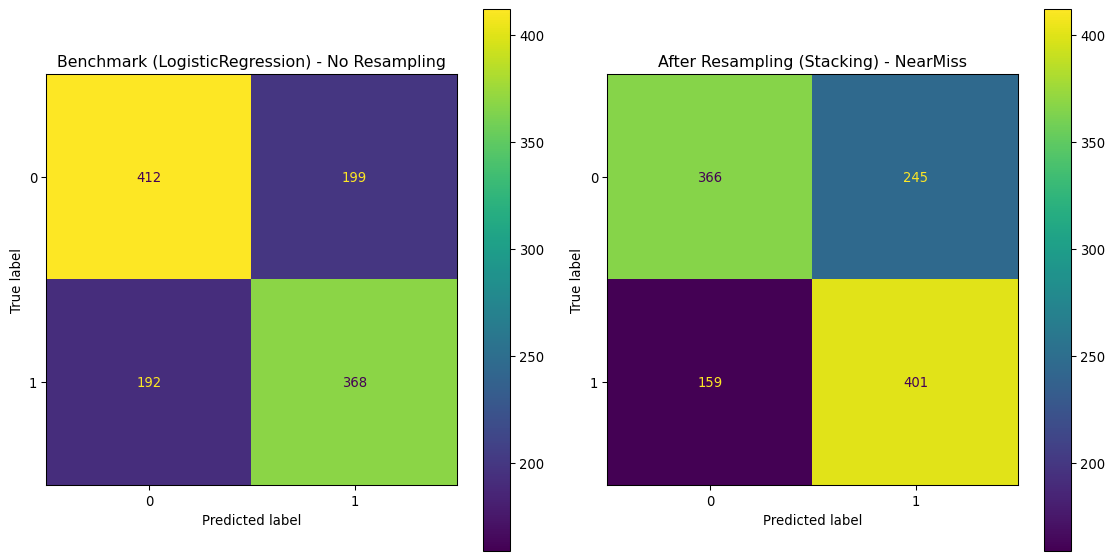

a. Total Kerugian (Benchmark):

    'Model terbaik benchmark: LogisticRegression'

    - FP --> Asumsi deposit, realita tidak deposit = 166.39 USD       
    - FP = $33,111.61

    - FN --> Asumsi diabaikan, realita deposit = 491 USD
    - FN = $94,272.00

  * Total kerugian benchmark --> $127,383.61

b. Total Loss (After Resampling):

    'Best Model After Resampling: Stacking (Resampling: NearMiss)'

    - FP --> Asumsi deposit, realita tidak deposit = 166.39 USD       
    - FP = $40,765.55

    - FN --> Asumsi diabaikan, realita deposit = 491 USD
    - FN = $78,069.00

  * Total kerugian menggunakan sampling --> $118,834.55

Kerugian berkurang dari $127,383.61 ke $118,834.55, bank bisa mengurangi kerugian sebesar $8,549.06


In [38]:
# Create confusion matrices
fig, axes = plt.subplots(1, 2, figsize = (12, 6), dpi = 95)

# Confusion matrix before resampling
cm_nonSampling   = confusion_matrix(y_test, y_pred_modelNonSampling)
disp_nonSampling = ConfusionMatrixDisplay(confusion_matrix=cm_nonSampling)

# Confusion matrix after best resampling method
cm_sampling   = confusion_matrix(y_test, y_pred_test_modelSampling)
disp_sampling = ConfusionMatrixDisplay(confusion_matrix=cm_sampling)

# Find the common color range for both matrices
all_values = np.concatenate((cm_nonSampling.flatten(), cm_sampling.flatten()))
vmin, vmax = all_values.min(), all_values.max()

# Plot confusion matrices with the same color range
disp_nonSampling.plot(ax = axes[0], cmap = 'viridis', colorbar = True)
im = disp_nonSampling.im_
im.set_clim(vmin, vmax)  # Set common color range for non-sampling plot
axes[0].set_title(f'Benchmark ({best_model_name_noSampling}) - No Resampling')
axes[0].grid(False)

disp_sampling.plot(ax=axes[1], cmap='viridis', colorbar=True)
im = disp_sampling.im_
im.set_clim(vmin, vmax)  # Set common color range for sampling plot
axes[1].set_title(f'After Resampling ({best_model_name_withSampling}) - {best_resampling_method}')
axes[1].grid(False)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Calculate total loss
fn_noSamp, fp_noSamp = cm_nonSampling[1][0], cm_nonSampling[0][1]
loss_noSamp = (fp_noSamp * FP_Assumption) + (fn_noSamp * FN_Assumption)
tLoss_noSamp = "${:,.2f}".format(loss_noSamp)

fn_wSamp, fp_wSamp = cm_sampling[1][0], cm_sampling[0][1]
loss_wSamp = (fp_wSamp * FP_Assumption) + (fn_wSamp * FN_Assumption)
tLoss_wSamp = "${:,.2f}".format(loss_wSamp)

# Calculate savings
tSave_no_with = "${:,.2f}".format(loss_noSamp - loss_wSamp)

# Print conclusions for both confusion matrices
print(f'''a. Total Kerugian (Benchmark):\n
    'Model terbaik benchmark: {best_model_name_noSampling}'\n
    - FP --> Asumsi deposit, realita tidak deposit = {FP_Assumption} USD       
    - FP = {"${:,.2f}".format(fp_noSamp * FP_Assumption)}\n
    - FN --> Asumsi diabaikan, realita deposit = {FN_Assumption} USD
    - FN = {"${:,.2f}".format(fn_noSamp * FN_Assumption)}\n
  * Total kerugian benchmark --> {tLoss_noSamp}

b. Total Loss (After Resampling):\n
    'Best Model After Resampling: {best_model_name_withSampling} (Resampling: {best_resampling_method})'\n
    - FP --> Asumsi deposit, realita tidak deposit = {FP_Assumption} USD       
    - FP = {"${:,.2f}".format(fp_wSamp * FP_Assumption)}\n
    - FN --> Asumsi diabaikan, realita deposit = {FN_Assumption} USD
    - FN = {"${:,.2f}".format(fn_wSamp * FN_Assumption)}\n
  * Total kerugian menggunakan sampling --> {tLoss_wSamp}

Kerugian berkurang dari {tLoss_noSamp} ke {tLoss_wSamp}, bank bisa mengurangi kerugian sebesar {tSave_no_with}''')

**Benchmark Model**


Model Regresi Logistik: Model regresi logistik tanpa resampling memiliki jumlah true negatives yang lebih tinggi, namun jumlah true positives yang lebih rendah dibandingkan dengan model stacking.

**Stacking Model dengan NearMiss**

Peningkatan Deteksi Positif: Model stacking dengan resampling NearMiss menunjukkan peningkatan dalam jumlah true positives dan pengurangan jumlah false negatives, yang mengindikasikan perbaikan dalam mendeteksi kasus positif.

Trade-off: Namun, model ini memiliki jumlah false positives yang lebih tinggi, yang menunjukkan adanya trade-off antara perbaikan deteksi positif dan peningkatan jumlah false positives.

***

## **Hyperparameter Tuning**

In [39]:
# Extract the best model, resampling method, and scoring metric from cross-validation resampling results
best_model_name        = best_model_name_withSampling     # Replace with the actual best model name
best_resampling_method = best_resampling_method           # Replace with the actual best resampling method
best_scoring_metric    = best_metric.split('_')[2]        # Replace with the actual best scoring metric

# Define the objective function
def objective(trial):
    # Define the hyperparameters to tune based on the best model
    if best_model_name == 'RandomForest':
        n_estimators      = trial.suggest_int('modeling__n_estimators', 50, 500)
        max_depth         = trial.suggest_categorical('modeling__max_depth', [None, 10, 20, 30, 40, 50])
        min_samples_split = trial.suggest_int('modeling__min_samples_split', 2, 15)
        min_samples_leaf  = trial.suggest_int('modeling__min_samples_leaf', 1, 6)
        max_features      = trial.suggest_categorical('modeling__max_features', ['sqrt', 'log2', None])
        bootstrap         = trial.suggest_categorical('modeling__bootstrap', [True, False])
        model = RandomForestClassifier(
            n_estimators      = n_estimators,
            max_depth         = max_depth,
            min_samples_split = min_samples_split,
            min_samples_leaf  = min_samples_leaf,
            max_features      = max_features,
            bootstrap         = bootstrap,
            random_state      = RANDOM_SEED
        )
    elif best_model_name == 'AdaBoost':
        n_estimators  = trial.suggest_int('modeling__n_estimators', 50, 500)
        learning_rate = trial.suggest_float('modeling__learning_rate', 0.01, 1.0)
        model = AdaBoostClassifier(
            n_estimators  = n_estimators,
            learning_rate = learning_rate,
            random_state  = RANDOM_SEED
        )
    elif best_model_name == 'GradientBoosting':
        n_estimators  = trial.suggest_int('modeling__n_estimators', 50, 500)
        max_depth     = trial.suggest_int('modeling__max_depth', 3, 10)
        learning_rate = trial.suggest_float('modeling__learning_rate', 0.01, 0.3)
        subsample     = trial.suggest_float('modeling__subsample', 0.5, 1.0)
        model = GradientBoostingClassifier(
            n_estimators  = n_estimators,
            max_depth     = max_depth,
            learning_rate = learning_rate,
            subsample     = subsample,
            random_state  = RANDOM_SEED
        )
    elif best_model_name == 'XGBoost':
        n_estimators     = trial.suggest_int('modeling__n_estimators', 50, 500)
        max_depth        = trial.suggest_int('modeling__max_depth', 3, 10)
        learning_rate    = trial.suggest_float('modeling__learning_rate', 0.01, 0.3)
        subsample        = trial.suggest_float('modeling__subsample', 0.5, 1.0)
        colsample_bytree = trial.suggest_float('modeling__colsample_bytree', 0.5, 1.0)
        model = XGBClassifier(
            n_estimators     = n_estimators,
            max_depth        = max_depth,
            learning_rate    = learning_rate,
            subsample        = subsample,
            colsample_bytree = colsample_bytree,
            random_state     = RANDOM_SEED
        )
    elif best_model_name == 'LogisticRegression':
        C = trial.suggest_float('modeling__C', 0.01, 10.0)
        model = LogisticRegression(C = C, random_state = RANDOM_SEED)
    elif best_model_name == 'KNN':
        n_neighbors = trial.suggest_int('modeling__n_neighbors', 1, 20)
        model = KNeighborsClassifier(n_neighbors = n_neighbors)
    elif best_model_name == 'DecisionTree':
        max_depth         = trial.suggest_int('modeling__max_depth', 3, 20)
        min_samples_split = trial.suggest_int('modeling__min_samples_split', 2, 20)
        min_samples_leaf  = trial.suggest_int('modeling__min_samples_leaf', 1, 20)
        model = DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split = min_samples_split,
            min_samples_leaf  = min_samples_leaf,
            random_state      = RANDOM_SEED
        )
    elif best_model_name == 'Voting':
        # Define specific hyperparameters for each base estimator
        log_reg_params = {
            'C': trial.suggest_float('modeling__log_reg_C', 0.01, 10.0)
        }
        knn_params = {
            'n_neighbors': trial.suggest_int('modeling__knn_n_neighbors', 1, 20)
        }
        dec_tree_params = {
            'max_depth': trial.suggest_int('modeling__tree_max_depth', 3, 20),
            'min_samples_split': trial.suggest_int('modeling__tree_min_samples_split', 2, 20),
            'min_samples_leaf': trial.suggest_int('modeling__tree_min_samples_leaf', 1, 20)
        }
        
        # Create the individual models with the suggested hyperparameters
        log_reg  = LogisticRegression(**log_reg_params, random_state = RANDOM_SEED)
        knn      = KNeighborsClassifier(**knn_params)
        dec_tree = DecisionTreeClassifier(**dec_tree_params, random_state = RANDOM_SEED)

        model = VotingClassifier(estimators = [
            ('logreg', log_reg), 
            ('knn', knn), 
            ('tree', dec_tree),
        ], voting=trial.suggest_categorical('modeling__voting', ['hard', 'soft']))
    elif best_model_name == 'Stacking':
        # Define hyperparameters for base models
        log_reg_C       = trial.suggest_float('modeling__logreg__C', 0.01, 200, log = True)
        knn_n_neighbors = trial.suggest_int('modeling__knn__n_neighbors', 1, 15, step = 1)
        tree_max_depth  = trial.suggest_int('modeling__tree__max_depth', 10, 30, step = 5)
        
        # Create the individual models with the suggested hyperparameters
        log_reg = LogisticRegression(C=log_reg_C, random_state = RANDOM_SEED)
        knn = KNeighborsClassifier(n_neighbors = knn_n_neighbors)
        dec_tree = DecisionTreeClassifier(max_depth = tree_max_depth, random_state = RANDOM_SEED)

        # Define the final estimator (meta-model)
        final_estimator = trial.suggest_categorical(
            'modeling__final_estimator', 
            ['LogisticRegression', 'RandomForest']
        )
        if final_estimator == 'LogisticRegression':
            final_estimator = LogisticRegression(random_state = RANDOM_SEED)
        else:
            final_estimator = RandomForestClassifier(random_state = RANDOM_SEED)
        
        model = StackingClassifier(
            estimators=[
                ('logreg', log_reg), 
                ('knn', knn), 
                ('tree', dec_tree)
            ],
            final_estimator=final_estimator,
            cv=5
        )

    # Create the pipeline with the suggested hyperparameters
    pipe_prep_model = imbPipeline([
        ("preprocessing", transformer),
        ("resampling", resampling_methods[best_resampling_method]),
        ("modeling", model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipe_prep_model, X_train, y_train, cv = 5, scoring = scoring_functions[best_scoring_metric], n_jobs = -1)
    return scores.mean()

# Create the study and optimize the objective function
study = optuna.create_study(direction = 'maximize', sampler = optuna.samplers.TPESampler(seed = RANDOM_SEED))
study.optimize(objective, n_trials = 500)

# Get the best parameters
best_params = study.best_params

# Create the pipeline with the best parameters
if best_model_name == 'RandomForest':
    model = RandomForestClassifier(
        n_estimators      = best_params['modeling__n_estimators'],
        max_depth         = best_params['modeling__max_depth'],
        min_samples_split = best_params['modeling__min_samples_split'],
        min_samples_leaf  = best_params['modeling__min_samples_leaf'],
        max_features      = best_params['modeling__max_features'],
        bootstrap         = best_params['modeling__bootstrap'],
        random_state      = RANDOM_SEED
    )
elif best_model_name == 'AdaBoost':
    model = AdaBoostClassifier(
        n_estimators  = best_params['modeling__n_estimators'],
        learning_rate = best_params['modeling__learning_rate'],
        random_state  = RANDOM_SEED
    )
elif best_model_name == 'GradientBoosting':
    model = GradientBoostingClassifier(
        n_estimators  = best_params['modeling__n_estimators'],
        max_depth     = best_params['modeling__max_depth'],
        learning_rate = best_params['modeling__learning_rate'],
        subsample     = best_params['modeling__subsample'],
        random_state  = RANDOM_SEED
    )
elif best_model_name == 'XGBoost':
    model = XGBClassifier(
        n_estimators     = best_params['modeling__n_estimators'],
        max_depth        = best_params['modeling__max_depth'],
        learning_rate    = best_params['modeling__learning_rate'],
        subsample        = best_params['modeling__subsample'],
        colsample_bytree = best_params['modeling__colsample_bytree'],
        random_state     = RANDOM_SEED
    )
elif best_model_name == 'LogisticRegression':
    model = LogisticRegression(C = best_params['modeling__C'], random_state = RANDOM_SEED)
elif best_model_name == 'KNN':
    model = KNeighborsClassifier(n_neighbors = best_params['modeling__n_neighbors'])
elif best_model_name == 'DecisionTree':
    model = DecisionTreeClassifier(
        max_depth         = best_params['modeling__max_depth'],
        min_samples_split = best_params['modeling__min_samples_split'],
        min_samples_leaf  = best_params['modeling__min_samples_leaf'],
        random_state      = RANDOM_SEED
    )
elif best_model_name == 'Voting':
    # Update the parameters of the individual models
    log_reg = LogisticRegression(C = best_params['modeling__log_reg_C'], random_state = RANDOM_SEED)
    knn     = KNeighborsClassifier(n_neighbors = best_params['modeling__knn_n_neighbors'])
    dec_tree = DecisionTreeClassifier(
        max_depth         = best_params['modeling__tree_max_depth'],
        min_samples_split = best_params['modeling__tree_min_samples_split'],
        min_samples_leaf  = best_params['modeling__tree_min_samples_leaf'],
        random_state      = RANDOM_SEED
    )

    model = VotingClassifier(
        estimators = [
            ('logreg', log_reg), 
            ('knn', knn), 
            ('tree', dec_tree)
        ],
        voting = best_params['modeling__voting']
    )
elif best_model_name == 'Stacking':
    # Create the individual models with the best hyperparameters
    log_reg  = LogisticRegression(C = best_params['modeling__logreg__C'], random_state = RANDOM_SEED)
    knn      = KNeighborsClassifier(n_neighbors = best_params['modeling__knn__n_neighbors'])
    dec_tree = DecisionTreeClassifier(max_depth = best_params['modeling__tree__max_depth'], random_state = RANDOM_SEED)

    # Define the final estimator (meta-model)
    if best_params['modeling__final_estimator'] == 'LogisticRegression':
        final_estimator = LogisticRegression(random_state = RANDOM_SEED)
    else:
        final_estimator = RandomForestClassifier(random_state = RANDOM_SEED)
    
    model = StackingClassifier(
        estimators = [
            ('logreg', log_reg), 
            ('knn', knn), 
            ('tree', dec_tree)
        ],
        final_estimator = final_estimator,
        cv = 5
    )

# Create the final pipeline with the best parameters
pipe_prep_model = imbPipeline([
    ("preprocessing", transformer),
    ("resampling", resampling_methods[best_resampling_method]),
    ("modeling", model)
])

# Fit the model with the best parameters
pipe_prep_model.fit(X_train, y_train)

# Predict the target variable for the train and test data
y_pred_train = pipe_prep_model.predict(X_train)
y_pred_test = pipe_prep_model.predict(X_test)

# Evaluate the model using the best scoring metric
best_scoring_function = score_metrics[best_scoring_metric]

score_train = best_scoring_function(y_train, y_pred_train)
score_test = best_scoring_function(y_test, y_pred_test)

[I 2025-02-13 20:17:34,654] A new study created in memory with name: no-name-ea74a029-99ec-4c7a-a3b7-ae7eb053dc7d
[I 2025-02-13 20:17:39,252] Trial 0 finished with value: 0.7003154574132492 and parameters: {'modeling__logreg__C': 2.293313050134436, 'modeling__knn__n_neighbors': 11, 'modeling__tree__max_depth': 25, 'modeling__final_estimator': 'LogisticRegression'}. Best is trial 0 with value: 0.7003154574132492.
[I 2025-02-13 20:17:42,209] Trial 1 finished with value: 0.7034700315457412 and parameters: {'modeling__logreg__C': 5.9980482402910935, 'modeling__knn__n_neighbors': 7, 'modeling__tree__max_depth': 30, 'modeling__final_estimator': 'LogisticRegression'}. Best is trial 1 with value: 0.7034700315457412.
[I 2025-02-13 20:17:44,838] Trial 2 finished with value: 0.7063091482649843 and parameters: {'modeling__logreg__C': 25.42337111718209, 'modeling__knn__n_neighbors': 8, 'modeling__tree__max_depth': 20, 'modeling__final_estimator': 'LogisticRegression'}. Best is trial 2 with value: 0

In [40]:
# Show result
print('Model terbaik:', best_model_name)
print('Parameter terbaik:')
display(best_params)
print(f'Skot terbaik ({best_scoring_metric.upper()}):', round(study.best_value, 6), f'({round(study.best_value * 100, 2)} %)')
print(f'Skor terbaik Test ({best_scoring_metric.upper()}):', round(score_test, 6), f'({round(score_test * 100, 2)} %)')

Model terbaik: Stacking
Parameter terbaik:


{'modeling__logreg__C': 0.2873050904425744,
 'modeling__knn__n_neighbors': 15,
 'modeling__tree__max_depth': 30,
 'modeling__final_estimator': 'LogisticRegression'}

Skot terbaik (RECALL): 0.743218 (74.32 %)
Skor terbaik Test (RECALL): 0.730357 (73.04 %)


Ini menunjukkan bahwa tuning membantu meningkatkan kinerja model dalam mendeteksi kasus positif, baik pada data pelatihan maupun data tes.

#### **Kesimpulan**

Dengan menggunakan teknik resampling dan tuning, model Stacking menunjukkan peningkatan yang signifikan dalam mendeteksi kasus positif. Skor recall yang lebih tinggi mengindikasikan model ini lebih efektif dalam menangani dataset yang tidak seimbang, meningkatkan kinerja prediksi secara keseluruhan.

In [41]:
# Predict using the best model after hyperparameter tuning
y_pred_test = pipe_prep_model.predict(X_test)

# Print the classification report
print("Classification Report (After Hyperparameter Tuning):")
print(classification_report(y_test, y_pred_test))

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy Score (After Hyperparameter Tuning): {accuracy:.4f}')

Classification Report (After Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       611
           1       0.65      0.73      0.69       560

    accuracy                           0.68      1171
   macro avg       0.69      0.69      0.68      1171
weighted avg       0.69      0.68      0.68      1171

Accuracy Score (After Hyperparameter Tuning): 0.6849


Setelah melakukan hyperparameter tuning, performa model mengalami peningkatan yang terlihat dari hasil classification report dan accuracy score dan secara keseluruhan, hyperparameter tuning telah meningkatkan kemampuan model dalam mendeteksi kelas positif, memperbaiki keseimbangan antara precision dan recall, dan meningkatkan akurasi keseluruhan.

### **Perbandingan Sebelum dan Sesudah Tuning**

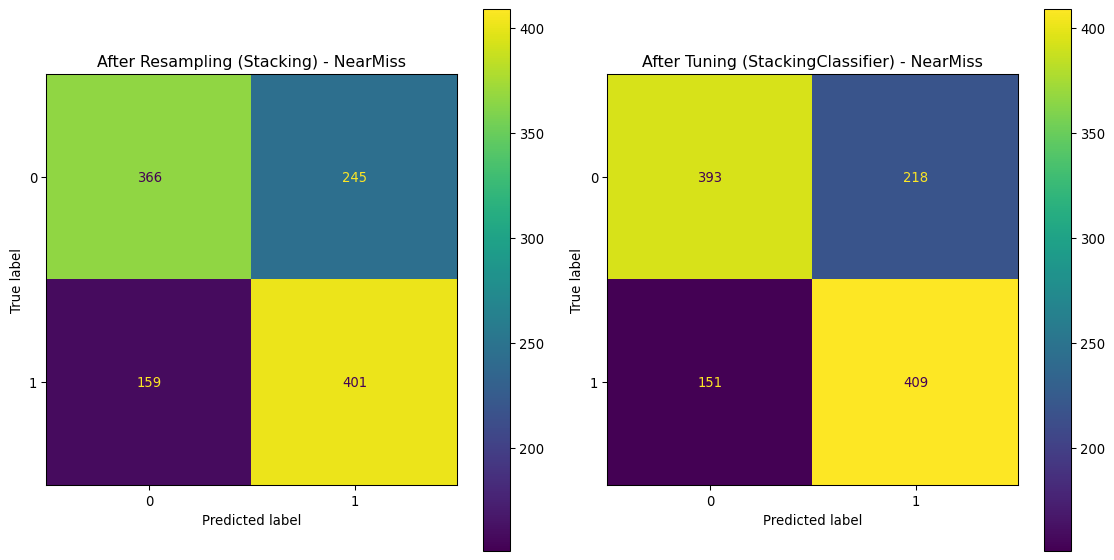

a. Total Kerugian (After Resampling):

    'Model terbaik dengan resampling: Stacking (Resampling: NearMiss)'

    - FP --> Asumsi deposit, realita tidak deposit = 166.39 USD     
    - FP = $40,765.55

    - FN --> Asumsi diabaikan, realita deposit = 491 USD
    - FN = $78,069.00

  * Total kerugian sebelum tuning --> $118,834.55

b. Total Kerugian (After Tuning):

    'Model terbaik setelah tuning: StackingClassifier (Resampling: NearMiss)'

    - FP --> Asumsi deposit, realita tidak deposit = 166.39 USD      
    - FP = $36,273.02

    - FN --> Asumsi diabaikan, realita deposit = 491 USD
    - FN = $74,141.00

  * Total kerugian dengan tuning --> $110,414.02

Kerugian berkurang dari $118,834.55 ke $110,414.02, bank bisa mengurangi kerugian sebesar $8,420.53


In [42]:
# Get the modeling and resampling names from the tuned model
modelingName   = pipe_prep_model.named_steps['modeling'].__class__.__name__
resamplingName = pipe_prep_model.named_steps['resampling'].__class__.__name__

# Create confusion matrices
fig, axes = plt.subplots(1, 2, figsize = (12, 6), dpi = 95)

# Confusion matrix after best resampling method
cm_sampling   = confusion_matrix(y_test, y_pred_test_modelSampling)
disp_sampling = ConfusionMatrixDisplay(confusion_matrix=cm_sampling)

# Confusion matrix after hyperparameter tuning
cm_tuned   = confusion_matrix(y_test, y_pred_test)
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned)

# Find the common color range for both matrices
all_values = np.concatenate((cm_sampling.flatten(), cm_tuned.flatten()))
vmin, vmax = all_values.min(), all_values.max()

# Plot confusion matrices with the same color range
disp_sampling.plot(ax = axes[0], cmap = 'viridis', colorbar = True)
im = disp_sampling.im_
im.set_clim(vmin, vmax)  # Set common color range for sampling plot
axes[0].set_title(f'After Resampling ({best_model_name_withSampling}) - {best_resampling_method}')
axes[0].grid(False)

disp_tuned.plot(ax = axes[1], cmap = 'viridis', colorbar = True)
im = disp_tuned.im_
im.set_clim(vmin, vmax)  # Set common color range for tuned plot
axes[1].set_title(f'After Tuning ({modelingName}) - {resamplingName}')
axes[1].grid(False)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Calculate total loss
fp_wSamp, fn_wSamp = (cm_sampling[0][1]), (cm_sampling[1][0])
loss_wSamp  = (fp_wSamp * FP_Assumption) + (fn_wSamp * FN_Assumption)
tLoss_wSamp = "${:,.2f}".format(loss_wSamp)

fp_samplingTuning, fn_samplingTuning = (cm_tuned[0][1]), (cm_tuned[1][0])
loss_samplingTuning  = (fp_samplingTuning * FP_Assumption) + (fn_samplingTuning * FN_Assumption)
tLoss_samplingTuning = "${:,.2f}".format(loss_samplingTuning)

# Calculate savings
tSave_samp_tuned = "${:,.2f}".format(loss_wSamp - loss_samplingTuning)

# Print conclusions for both confusion matrices
print(f'''a. Total Kerugian (After Resampling):\n
    'Model terbaik dengan resampling: {best_model_name_withSampling} (Resampling: {best_resampling_method})'\n
    - FP --> Asumsi deposit, realita tidak deposit = {FP_Assumption} USD     
    - FP = {"${:,.2f}".format(fp_wSamp * FP_Assumption)}\n
    - FN --> Asumsi diabaikan, realita deposit = {FN_Assumption} USD
    - FN = {"${:,.2f}".format(fn_wSamp * FN_Assumption)}\n
  * Total kerugian sebelum tuning --> {tLoss_wSamp}

b. Total Kerugian (After Tuning):\n
    'Model terbaik setelah tuning: {modelingName} (Resampling: {resamplingName})'\n
    - FP --> Asumsi deposit, realita tidak deposit = {FP_Assumption} USD      
    - FP = {"${:,.2f}".format(fp_samplingTuning * FP_Assumption)}\n
    - FN --> Asumsi diabaikan, realita deposit = {FN_Assumption} USD
    - FN = {"${:,.2f}".format(fn_samplingTuning * FN_Assumption)}\n
  * Total kerugian dengan tuning --> {tLoss_samplingTuning}

Kerugian berkurang dari {tLoss_wSamp} ke {tLoss_samplingTuning}, bank bisa mengurangi kerugian sebesar {tSave_samp_tuned}''')

**Model dengan Resampling**

Model Setelah Resampling: Menunjukkan peningkatan jumlah true positives dan pengurangan jumlah false negatives. Namun, terdapat peningkatan false positives, menunjukkan adanya trade-off antara perbaikan deteksi positif dan peningkatan jumlah false positives.

**Model Setelah di Tuning**

Model Setelah Tuning: Setelah tuning, menunjukkan peningkatan lebih lanjut dalam true negatives dan true positives, serta pengurangan false positives dan false negatives. Ini menunjukkan tuning membantu model menjadi lebih akurat dalam prediksi baik negatif maupun positif.

***

## **Permutation Importance**

**Permutation Importance**: Menyediakan ukuran pentingnya fitur yang tidak bergantung pada model tertentu dan memberikan refleksi yang lebih akurat tentang dampak suatu fitur terhadap kinerja model. Metode ini kurang dipengaruhi oleh mekanisme internal model.

In [43]:
# Transform the test data using the preprocessing pipeline
X_test_transformed = pipe_prep_model.named_steps['preprocessing'].transform(X_test)

# Calculate permutation importance
result = permutation_importance(
    pipe_prep_model.named_steps['modeling'], # Use the stacking classifier
    X_test_transformed,                      # Transformed test data
    y_test,                                  # True labels
    n_repeats    = 10,                       # Number of shuffles
    random_state = 42,                       # Random seed for reproducibility
    n_jobs       = -1                        # Use all CPU cores
)

# Get feature names after preprocessing
try:
    feature_names = pipe_prep_model.named_steps['preprocessing'].get_feature_names_out()
except AttributeError:
    # Fallback for older scikit-learn versions
    feature_names = [f"feature_{i}" for i in range(X_test_transformed.shape[1])]

# # Step 4: Print permutation importance
# for feature, importance in zip(feature_names, result.importances_mean):
#     print(f"{feature}: {importance:.4f}")

# Create a DataFrame for permutation importance
importance_df = pd.DataFrame({
    'Feature'    : feature_names,
    'Importance' : result.importances_mean
}).sort_values(by = 'Importance', ascending = False)

# Plot permutation importance using Plotly
fig = px.bar(
    importance_df,
    x           = "Importance",
    y           = "Feature",
    orientation = "h",
    title       = "Permutation Importances",
    labels      = {"Importance": "Importance", "Feature": "Feature"},
    color       = "Importance",
    color_continuous_scale = "Blues"
)

fig.update_layout(
    yaxis  = dict(categoryorder="total ascending"),
    width  = 1200,  # Set the width of the figure
    height = 1000   # Set the height of the figure
)

fig.show()

#### **Kesimpulan**

- Nilai kepentingan (0.02, 0.015, 0.01, 0.005) menunjukkan seberapa besar performa setiap feature terhadap model yang di gunakan.

- Nilai yang lebih tinggi: Fitur dengan kepentingan permutasi yang lebih tinggi sangat kritis bagi prediksi model. Mengubah fitur-fitur ini akan secara signifikan mengurangi performa model.

- Nilai yang lebih rendah: Fitur dengan kepentingan permutasi yang lebih rendah memiliki dampak yang lebih kecil pada model. Mengubah fitur-fitur ini tidak terlalu memengaruhi performa model.

Permutation Importance helps in understanding which features drive the model's predictions, allowing for better feature selection, model simplification, and informed decision-making.

***

## **Penentuan Threshold Optimal**

### **Precesion-Recall Curve (PR-Curve) dan Precision Curve** 

In [44]:
# Predict probabilities
y_pred_proba = pipe_prep_model.predict_proba(X_test)[:, 1]

# Compute precision-recall and ROC curves
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
fpr, tpr, _          = roc_curve(y_test, y_pred_proba)
average_precision    = average_precision_score(y_test, y_pred_proba)
roc_auc              = roc_auc_score(y_test, y_pred_proba)

# Create subplots
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.1,
    subplot_titles=[f'Precision-Recall Curve (AP = {average_precision:.2f})', 
                    f'ROC Curve (AUC = {roc_auc:.2f})'])

# Add Precision-Recall curve (bold line + gradient fill)
fig.add_trace(go.Scatter(x=recall, y=precision, fill='tozeroy', mode='lines', 
                         name='PR Curve', line=dict(width=3, color='blue'), 
                         fillcolor='rgba(100, 149, 237, 0.3)'), row=1, col=1)

# Add ROC curve (bold line + gradient fill)
fig.add_trace(go.Scatter(x=fpr, y=tpr, fill='tozeroy', mode='lines', 
                         name='ROC Curve', line=dict(width=3, color='blue'), 
                         fillcolor='rgba(147, 112, 219, 0.3)'), row=1, col=2)

# Add diagonal reference line to ROC
fig.add_shape(type='line', line=dict(dash='dash', color='gray', width=2),
              x0=0, x1=1, y0=0, y1=1, row=1, col=2)

# Update axis titles
fig.update_xaxes(title_text='Recall', row=1, col=1)
fig.update_yaxes(title_text='Precision', row=1, col=1)
fig.update_xaxes(title_text='False Positive Rate', row=1, col=2)
fig.update_yaxes(title_text='True Positive Rate', row=1, col=2)

# Update layout
fig.update_layout(template='plotly_white', width=1200, height=600, showlegend=False)

# Show plot
fig.show()

#### **Kesimpulan**

Ke dua grafik yang digunakan untuk mengevaluasi kinerja model klasifikasi biner. Grafik di sebelah kiri adalah Precision-Recall Curve dengan Area Under the Curve (AP) sebesar 0.74, sedangkan grafik di sebelah kanan adalah ROC Curve dengan Area Under the Curve (AUC) sebesar 0.75. Grafik Precision-Recall menunjukkan hubungan antara precision (ketepatan) dan recall (kelengkapan) pada berbagai ambang batas klasifikasi, sedangkan ROC Curve menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR) pada berbagai ambang batas klasifikasi. Kedua grafik ini penting karena memberikan wawasan tentang seberapa baik model dapat membedakan antara kelas positif dan negatif.

**Precision-Recall Curve:**

Grafik Precision-Recall menunjukkan bahwa model memiliki precision yang tinggi pada nilai recall yang rendah, tetapi precision menurun seiring dengan meningkatnya recall.

Area Under the Curve (AP) sebesar 0.74 menunjukkan bahwa model memiliki kinerja yang cukup baik dalam hal ketepatan dan kelengkapan.

**ROC Curve:**

Grafik ROC menunjukkan bahwa model memiliki True Positive Rate yang tinggi pada False Positive Rate yang rendah, yang berarti model dapat membedakan dengan baik antara kelas positif dan negatif.

Area Under the Curve (AUC) sebesar 0.75 menunjukkan bahwa model memiliki kinerja yang baik dalam hal kemampuan diskriminasi.

### **Threshold Optimal**

In [45]:
# Predict probabilities for the positive class
y_pred_proba_test  = pipe_prep_model.predict_proba(X_test)[:, 1]
y_pred_proba_train = pipe_prep_model.predict_proba(X_train)[:, 1]

# Evaluate thresholds and metrics
list_threshold = np.arange(0, 1, 0.01)
metrics = [(thresh, 
            score_metrics[best_scoring_metric](y_train, np.where(y_pred_proba_train > thresh, 1, 0)),
            score_metrics[best_scoring_metric](y_test, np.where(y_pred_proba_test > thresh, 1, 0)),
            confusion_matrix(y_test, np.where(y_pred_proba_test > thresh, 1, 0))) 
           for thresh in list_threshold]

# Create DataFrame with evaluation metrics
df_metrics = pd.DataFrame(metrics, columns=['Threshold', f'Best {best_scoring_metric.upper()} Score', f'Best Test {best_scoring_metric.upper()} Score', 'ConfusionMatrix'])
df_metrics['FP'] = df_metrics['ConfusionMatrix'].apply(lambda cm: cm[0][1])
df_metrics['FN'] = df_metrics['ConfusionMatrix'].apply(lambda cm: cm[1][0])
df_metrics['Est. Loss'] = df_metrics.apply(lambda row: row['FP'] * FP_Assumption + row['FN'] * FN_Assumption, axis=1)
df_metrics['Score Difference'] = df_metrics.apply(lambda row: abs(row[f'Best {best_scoring_metric.upper()} Score'] - row[f'Best Test {best_scoring_metric.upper()} Score']), axis=1)

# Display the DataFrame sorted by estimated loss
sorted_df_metrics = df_metrics.sort_values('Est. Loss').reset_index(drop=True)
display(sorted_df_metrics.head(10))

,Threshold,Best RECALL Score,Best Test RECALL Score,ConfusionMatrix,FP,FN,Est. Loss,Score Difference
0,0.32,0.888013,0.889286,"[[221, 390], [62, 498]]",390,62,95334.10,0.001273
1,0.31,0.893060,0.894643,"[[210, 401], [59, 501]]",401,59,95691.39,0.001583
2,0.30,0.899054,0.901786,"[[196, 415], [55, 505]]",415,55,96056.85,0.002732
3,0.33,0.878864,0.880357,"[[231, 380], [67, 493]]",380,67,96125.20,0.001493
4,0.29,0.907571,0.907143,"[[182, 429], [52, 508]]",429,52,96913.31,0.000428
5,0.34,0.867823,0.867857,"[[244, 367], [74, 486]]",367,74,97399.13,0.000034
6,0.39,0.826183,0.832143,"[[303, 308], [94, 466]]",308,94,97402.12,0.005960
7,0.37,0.841325,0.844643,"[[282, 329], [87, 473]]",329,87,97459.31,0.003318
8,0.28,0.911987,0.908929,"[[175, 436], [51, 509]]",436,51,97587.04,0.003059
9,0.38,0.833123,0.837500,"[[291, 320], [91, 469]]",320,91,97925.80,0.004377


In [46]:
display(sorted_df_metrics.head(5))

,Threshold,Best RECALL Score,Best Test RECALL Score,ConfusionMatrix,FP,FN,Est. Loss,Score Difference
0,0.32,0.888013,0.889286,"[[221, 390], [62, 498]]",390,62,95334.10,0.001273
1,0.31,0.893060,0.894643,"[[210, 401], [59, 501]]",401,59,95691.39,0.001583
2,0.30,0.899054,0.901786,"[[196, 415], [55, 505]]",415,55,96056.85,0.002732
3,0.33,0.878864,0.880357,"[[231, 380], [67, 493]]",380,67,96125.20,0.001493
4,0.29,0.907571,0.907143,"[[182, 429], [52, 508]]",429,52,96913.31,0.000428


***threshold terpilih***

- Threshold yang dipilih dari analisa tersbut berupa threshold dengan 0.39

In [47]:
# Find the optimal threshold based on the second row of the sorted DataFrame
optimal_threshold_row = sorted_df_metrics.iloc[6]
optimal_threshold = optimal_threshold_row['Threshold']
optimal_loss = optimal_threshold_row['Est. Loss']

# Print the optimal threshold and corresponding estimated loss
print(f'Threshold Optimal: {optimal_threshold:.2f}')
print(f'Estimasi Kerugian pada Threshold Optimal: ${optimal_loss:,.2f}')

# Predict using the optimal threshold
y_pred_optimal_test = (y_pred_proba_test >= optimal_threshold).astype(int)
y_pred_optimal_train = (y_pred_proba_train >= optimal_threshold).astype(int)

# Evaluate the model using the best scoring metric on both training and test sets
score_train_optimal = score_metrics[best_scoring_metric](y_train, y_pred_optimal_train)
score_test_optimal = score_metrics[best_scoring_metric](y_test, y_pred_optimal_test)

# Print the evaluation scores with the optimal threshold
print(f'Skor terbaik ({best_scoring_metric.upper()} dengan Threshold Optimal):', round(score_train_optimal, 6), f'({round(score_train_optimal * 100, 2)} %)')
print(f'Skor terbaik pada test ({best_scoring_metric.upper()} dengan Threshold Optimal):', round(score_test_optimal, 6), f'({round(score_test_optimal * 100, 2)} %)')

Threshold Optimal: 0.39
Estimasi Kerugian pada Threshold Optimal: $97,402.12
Skor terbaik (RECALL dengan Threshold Optimal): 0.826183 (82.62 %)
Skor terbaik pada test (RECALL dengan Threshold Optimal): 0.832143 (83.21 %)


In [48]:
# Predict using the optimal threshold
y_pred_optimal_test = (y_pred_proba_test >= optimal_threshold).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred_optimal_test))

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_optimal_test)
print(f'Accuracy Score: {accuracy:.4f}')

              precision    recall  f1-score   support

           0       0.76      0.50      0.60       611
           1       0.60      0.83      0.70       560

    accuracy                           0.66      1171
   macro avg       0.68      0.66      0.65      1171
weighted avg       0.69      0.66      0.65      1171

Accuracy Score: 0.6567


#### **Kesimpulan Threshold yang Terpilih**

penentuan threshold 0.39 setelah mempertimbangkan performa model dan estimasi kerugian. Meskipun ada perbedaan estimasi kerugian sekitar $2100, threshold 0.39 menawarkan keseimbangan terbaik antara precision, recall, dan F1-score.

Perubahan metode model dan penggunaan resampling secara signifikan meningkatkan kemampuan model dalam mendeteksi kasus positif. NearMiss membantu menyeimbangkan data yang tidak seimbang, sehingga model lebih efektif dalam mendeteksi kelas minoritas.

Dengan model Stacking, prediksi menjadi lebih akurat dan andal. Ini membuktikan pentingnya strategi resampling dalam pengolahan data yang tidak seimbang.

Threshold 0.39 dipilih untuk memastikan performa model yang seimbang dan dapat diandalkan dalam mendeteksi kasus positif, sambil meminimalkan potensi kerugian.

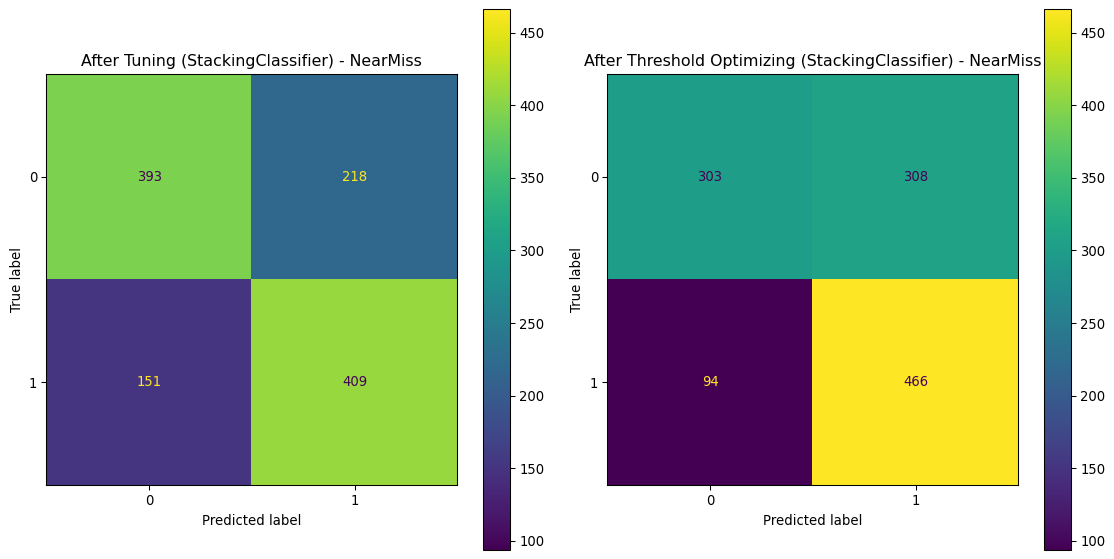

a. Total Kerugian (setelah Tuning):

    'Model terbaik setelah tuning: StackingClassifier (Resampling: NearMiss)'

    - FP --> Asumsi deposit, realita tidak deposit = 166.39 USD       
    - FP = $36,273.02

    - FN --> Asumsi diabaikan, realita deposit = 491 USD
    - FN = $74,141.00

  * Total kerugian dengan tuning --> $110,414.02

b. Total Kerugian (Setelah Optimalisasi Threshold):

    'Model terbaik pada optimalisasi threshold: StackingClassifier (Resampling: NearMiss)'

    - FP --> Asumsi deposit, realita tidak deposit = 166.39 USD       
    - FP = $51,248.12

    - FN --> Asumsi diabaikan, realita deposit = 491 USD
    - FN = $46,154.00

  * Total kerugian setelah optimalisasi threshold --> $97,402.12

Kerugian berkurang dari $110,414.02 ke $97,402.12, bank bisa mengurangi kerugian sebesar $13,011.90


In [49]:
# Create confusion matrices
fig, axes = plt.subplots(1, 2, figsize = (12, 6), dpi = 95)

# Confusion matrix after hyperparameter tuning
cm_tuned   = confusion_matrix(y_test, y_pred_test)
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned)

# Confusion matrix after threshold optimization
cm_optimal   = confusion_matrix(y_test, y_pred_optimal_test)
disp_optimal = ConfusionMatrixDisplay(confusion_matrix=cm_optimal)

# Find the common color range for both matrices
all_values = np.concatenate((cm_tuned.flatten(), cm_optimal.flatten()))
vmin, vmax = all_values.min(), all_values.max()

# Plot confusion matrices with the same color range
disp_tuned.plot(ax = axes[0], cmap = 'viridis', colorbar = True)
im = disp_tuned.im_
im.set_clim(vmin, vmax)  # Set common color range for tuned plot
axes[0].set_title(f'After Tuning ({modelingName}) - {resamplingName}')
axes[0].grid(False)

disp_optimal.plot(ax = axes[1], cmap = 'viridis', colorbar = True)
im = disp_optimal.im_
im.set_clim(vmin, vmax)  # Set common color range for optimal plot
axes[1].set_title(f'After Threshold Optimizing ({modelingName}) - {resamplingName}')
axes[1].grid(False)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Calculate total loss
fp_tuned, fn_tuned = (cm_tuned[0][1]), (cm_tuned[1][0])
loss_tuned = (fp_tuned * FP_Assumption) + (fn_tuned * FN_Assumption)
tLoss_tuned = "${:,.2f}".format(loss_tuned)

fp_optimal, fn_optimal = (cm_optimal[0][1]), (cm_optimal[1][0])
loss_optimal = (fp_optimal * FP_Assumption) + (fn_optimal * FN_Assumption)
tLoss_optimal = "${:,.2f}".format(loss_optimal)

# Calculate savings
tSave_tuned_optimal = "${:,.2f}".format(loss_tuned - loss_optimal)

# Print conclusions for both confusion matrices
print(f'''a. Total Kerugian (setelah Tuning):\n
    'Model terbaik setelah tuning: {modelingName} (Resampling: {resamplingName})'\n
    - FP --> Asumsi deposit, realita tidak deposit = {FP_Assumption} USD       
    - FP = {"${:,.2f}".format(fp_tuned * FP_Assumption)}\n
    - FN --> Asumsi diabaikan, realita deposit = {FN_Assumption} USD
    - FN = {"${:,.2f}".format(fn_tuned * FN_Assumption)}\n
  * Total kerugian dengan tuning --> {tLoss_tuned}

b. Total Kerugian (Setelah Optimalisasi Threshold):\n
    'Model terbaik pada optimalisasi threshold: {modelingName} (Resampling: {resamplingName})'\n
    - FP --> Asumsi deposit, realita tidak deposit = {FP_Assumption} USD       
    - FP = {"${:,.2f}".format(fp_optimal * FP_Assumption)}\n
    - FN --> Asumsi diabaikan, realita deposit = {FN_Assumption} USD
    - FN = {"${:,.2f}".format(fn_optimal * FN_Assumption)}\n
  * Total kerugian setelah optimalisasi threshold --> {tLoss_optimal}

Kerugian berkurang dari {tLoss_tuned} ke {tLoss_optimal}, bank bisa mengurangi kerugian sebesar {tSave_tuned_optimal}''')

Optimalisasi threshold pada model StackingClassifier menggunakan NearMiss membantu meningkatkan kemampuan model dalam mendeteksi kasus positif dengan benar, yang terlihat dari peningkatan jumlah True Positives dan penurunan False Negatives. Namun, ini datang dengan trade-off berupa peningkatan jumlah False Positives. Dalam konteks aplikasi praktis, optimalisasi threshold dapat berguna untuk meningkatkan recall model, terutama dalam situasi di mana mendeteksi setiap kasus positif adalah prioritas utama.

**Model Setelah Tuning:** 

Menunjukkan bahwa model telah melakukan prediksi dengan benar untuk banyak instansi negatif (True Negatives) dan positif (True Positives), tetapi masih ada sejumlah False Positives dan False Negatives.

**Model Setelah Optimalisasi Threshold:** 

Menunjukkan peningkatan signifikan dalam jumlah True Positives dan pengurangan dalam jumlah False Negatives. Namun, ini juga menyebabkan peningkatan jumlah False Positives.

***

## **Limitations of the Model**

Meskipun ada upaya untuk membangun model yang kuat dan akurat untuk memprediksi perilaku deposit dalam kampanye pemasaran bank, ada beberapa keterbatasan dan tantangan yang harus diakui:

1. Keterbatasan Fitur:

   Model ini hanya menggunakan fitur yang tersedia dalam dataset. Fitur-fitur lain yang mungkin relevan dan dapat meningkatkan kinerja model tidak disertakan karena keterbatasan data.

2. Asumsi Sederhana:

   Beberapa asumsi yang digunakan dalam analisis, seperti asumsi biaya kampanye dan nilai deposit, mungkin tidak sepenuhnya akurat atau representatif untuk semua situasi.

4. Keterbatasan Interpretasi:

   Meskipun model dapat memberikan prediksi yang akurat, interpretasi hasil model mungkin tidak selalu mudah dipahami oleh pengguna non-teknis.
   
Dengan memahami keterbatasan ini, diharapkan dapat dilakukan perbaikan dan pengembangan lebih lanjut untuk meningkatkan kinerja dan akurasi model di masa mendatang.

***

## **Kesimpulan dan Rekomendasi**

### **Kesimpulan**

In [50]:
# Predict using the optimal threshold
y_pred_optimal_test = (y_pred_proba_test >= optimal_threshold).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred_optimal_test))

              precision    recall  f1-score   support

           0       0.76      0.50      0.60       611
           1       0.60      0.83      0.70       560

    accuracy                           0.66      1171
   macro avg       0.68      0.66      0.65      1171
weighted avg       0.69      0.66      0.65      1171



Berdasarkan laporan klasifikasi dari model tersbut, model telah mencapai akurasi keseluruhan sebesar 66% dengan recall yang tinggi (89%) untuk kelas 1, yang berguna untuk meminimalkan kehilangan peluang nasabah deposit. Namun, precision yang lebih rendah (60%) menunjukkan bahwa model masih menghasilkan banyak false positives, yang dapat meningkatkan biaya kampanye. Trade-off antara precision dan recall perlu dipertimbangkan berdasarkan tujuan bisnis yang dimana pertimangannya adalah untuk mengurangi biaya kampanye sebanyak mungkin dikarenakan kehilangan atau melewati kesempatan nasabah akan melakukan deposit lebih besar kerugiannya dibandingkan memberikan campanye terhadap nasabah yang ternyata tidak melakukan deposit jadi tujuan utama adalah meminimalkan kehilangan peluang, recall yang tinggi adalah prioritas

#### **1. Tujuan Kampanye**

Kampanye pemasaran bank bertujuan untuk meningkatkan jumlah nasabah yang melakukan deposit dengan mengidentifikasi nasabah yang berpotensi melakukan deposit dan menargetkan mereka dengan kampanye yang tepat.

- **False Positives (FP):** 
    
    - Kelas 1 (Kampanye ditargetkan pada nasabah yang tidak melakukan deposit, mengakibatkan pemborosan biaya.)

    Model berhasil mengidentifikasi 83% dari nasabah yang sebenarnya melakukan deposit, menunjukkan recall yang kuat. Namun, dengan precision sebesar 60%, sepertiga dari prediksi deposit sebenarnya tidak melakukan deposit.


- **False Negatives (FN):** 

    - Kelas 0 (Kampanye gagal menargetkan nasabah yang sebenarnya akan melakukan deposit, mengakibatkan hilangnya peluang.)

    Model mencapai precision sebesar 76% dan recall sebesar 50%, menunjukkan kinerja yang kuat dalam mengidentifikasi nasabah yang tidak melakukan deposit, meskipun masih ada beberapa kesalahan.

#### **2. Dampak Biaya**

Estimasi kerugian setiap step dari permodelan ini:

- Benchmark: Estimasi kerugian mencapai $127,383.61.

- Benchmark dengan resampling: Estimasi kerugian mencapai $118,834.55.

- Setelah tuning model: Estimasi kerugian mencapai $110,414.02.

- Setelah optimalisasi threshold: Estimasi kerugian mencapai $97,402.12

Dengan menerapkan model ini, bank telah berhasil mengurangi potensi kerugian finansial secara signifikan. Dengan perhitungan seperti berikut:

`Total Kerugian pada Benchmark - Total Kerugian Setelah Optimalisasi Threshold`

a. Pengurangan kerugian sebesar: 

`127,383.61 - 97,402.12 = 29,981.49`

b. Persentase pengurangan kerugian:

`(29,981.49 / 127,383.61) * 100 ≈ 23.54%`

Dengan demikian, model ini tidak hanya membantu dalam mengidentifikasi nasabah yang berpotensi melakukan deposit dengan lebih baik, tetapi juga secara signifikan mengurangi kerugian finansial yang diakibatkan oleh kampanye pemasaran yang tidak efektif. Optimalisasi threshold dan penggunaan teknik resampling telah terbukti efektif dalam meningkatkan kinerja model dan mengurangi biaya yang tidak perlu.

#### **3. Kepentingan Feature**

Permutation importance digunakan untuk mengukur pentingnya setiap fitur dalam model. Teknik ini bekerja dengan mengacak nilai dari satu fitur dan mengukur penurunan kinerja model. Fitur yang menyebabkan penurunan kinerja terbesar dianggap paling penting.

Hasil dari permutation importance menunjukkan bahwa fitur-fitur berikut memiliki pengaruh terbesar terhadap prediksi model:

- balance: Saldo rekening nasabah memiliki pengaruh terbesar terhadap keputusan nasabah untuk melakukan deposit.
- age: Usia nasabah juga merupakan faktor penting yang mempengaruhi keputusan untuk melakukan deposit.
- campaign: Jumlah total upaya kontak yang dilakukan selama kampanye juga berpengaruh signifikan.
- pdays: Jumlah hari sejak nasabah terakhir kali dihubungi dalam kampanye sebelumnya.
- job: Jenis pekerjaan nasabah juga memberikan kontribusi yang signifikan terhadap prediksi model.

Secara keseluruhan, model ini memberikan alat yang kuat untuk pengambilan keputusan dalam kampanye pemasaran bank, membantu bank untuk lebih efektif dalam menargetkan nasabah yang berpotensi melakukan deposit dan mengurangi pemborosan biaya kampanye. Pendekatan yang komprehensif dan adaptif ini akan membantu bank mencapai tujuan bisnis mereka secara lebih efektif dan efisien. 


### **Rekomendasi**

#### **1. Penambahan Fitur dan Pemahaman Lebih Setiap Fitur**

- Dengan fitur yang memiliki pengaruh besar terhadap prediksi model (`balance`, `age`, `campaign`, `pdays`, `job`) bank dapat merancang strategi pemasaran yang lebih efektif dan personal. Misalnya, bank dapat menargetkan nasabah dengan saldo rekening yang lebih tinggi atau menyesuaikan pendekatan berdasarkan usia dan jenis pekerjaan nasabah.

- Untuk jauh lebih meningkatkan model dan pemahaman model, lebih baik untuk penambahan fitur dengan cara pengumpulan data secara langsung seperti:
    - Pendidikan
    - Status pernikahan.
    - Jumlah deposit
    - Gaji
    - etc.

#### **2. Evaluasi Biaya Secara Berkala**

Lakukan evaluasi biaya secara berkala untuk memastikan bahwa model yang digunakan memberikan keuntungan finansial yang optimal. Pertimbangkan untuk menyesuaikan threshold dan strategi resampling berdasarkan perubahan dalam biaya False Positives dan False Negatives. Evaluasi berkala ini memungkinkan bank untuk mengoptimalkan alokasi sumber daya dan memaksimalkan return on investment (ROI).

#### **3. Pemantauan dan Penyesuaian**

Pantau kinerja model secara berkala dan lakukan penyesuaian jika diperlukan. Perubahan dalam perilaku nasabah atau kondisi pasar bisa mempengaruhi kinerja model, jadi penting untuk tetap adaptif. Dengan pemantauan yang konsisten, bank bisa cepat mengidentifikasi dan mengatasi masalah yang mungkin muncul, serta memastikan model tetap relevan dan efektif.

Pemantauan yang konsisten memungkinkan bank untuk segera mengidentifikasi dan mengatasi masalah yang mungkin timbul, serta memastikan model tetap relevan dan efektif. Penggunaan teknik seperti Optuna untuk hyperparameter tuning dapat membantu dalam menjaga kinerja model tetap optimal.

#### **4. Penggunaan Model dengan Resampling dan Optimasi Threshold**

Kami merekomendasikan model Stacking Classifier dengan NearMiss dan optimasi threshold. Kombinasi ini efektif dalam mengurangi total kerugian secara signifikan. Dengan recall yang tinggi, model ini lebih efisien dalam mengidentifikasi nasabah yang berpotensi melakukan deposit, meskipun ada trade-off dengan precision. Optimasi threshold membantu menyesuaikan model agar lebih sesuai dengan tujuan bisnis, terutama dalam konteks biaya False Positives dan False Negatives.

Secara keseluruhan, pendekatan ini terbukti mampu meningkatkan efisiensi dan kinerja model dalam mendeteksi nasabah yang potensial, sambil tetap memperhatikan biaya yang mungkin timbul dari prediksi yang tidak akurat.

### **Harapan**

Dengan mengikuti rekomendasi ini, bank dapat mengoptimalkan kampanye pemasaran mereka, meningkatkan jumlah nasabah yang melakukan deposit, dan memaksimalkan return on investment (ROI) dengan meminimalkan kesalahan False Positives dan False Negatives. Pendekatan yang komprehensif dan adaptif ini akan membantu bank mencapai tujuan bisnis mereka secara lebih efektif dan efisien.

***

## **Penyimpanan Model untuk Pickle**

Penyimpanan model dilakukan dengan membuat kembali pipeline secara manual dan memasukan semua method, resapling, dan parameter terbaik pada saat melakukan pemodelan, dan penambahan threshold untuk menyesuaikan dengan hasil akhir yang telah di lakukan.

Membuat custom classifier dengan menggunakan threshold

In [51]:
class ThresholdClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_model, threshold=0.5):
        self.base_model = base_model
        self.threshold = threshold

    def fit(self, X, y):
        self.base_model.fit(X, y)
        return self

    def predict_proba(self, X):
        return self.base_model.predict_proba(X)

    def predict(self, X):
        proba = self.predict_proba(X)[:, 1]
        return (proba >= self.threshold).astype(int)

Kode untuk Mendefinisikan, Menyesuaikan, dan Menyimpan Model Akhir dengan Ambang Batas

In [52]:
# Define base models with best hyperparameters from Optuna
logRegression = LogisticRegression(C=best_params['modeling__logreg__C'])
knnClass      = KNeighborsClassifier(n_neighbors=best_params['modeling__knn__n_neighbors'])
decTree       = DecisionTreeClassifier(max_depth=best_params['modeling__tree__max_depth'])

# Define stacking classifier
stackingClass = StackingClassifier(
    estimators = [
        ('logreg', logRegression),
        ('knn', knnClass),
        ('tree', decTree)
    ],
    final_estimator = LogisticRegression()
)

# Define the optimal threshold
optimal_threshold = optimal_threshold  # Replace with the actual chosen threshold value

# Create the custom classifier with threshold
threshold_classifier = ThresholdClassifier(base_model = stackingClass, threshold = optimal_threshold)

# Create the pipeline with the custom classifier
pipe_feature = imbPipeline([
    ("preprocessing", transformer),
    ("resampling", NearMiss),
    ("modeling", threshold_classifier)
])

# Fit the final model on the entire training data
pipe_feature.fit(X_train, y_train)

# Save the model to a file
model_filename = 'bank_campaign_final_model_with_threshold_Pradhana_Satria.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(pipe_feature, file)

print(f'Model dengan threshold di save pada {model_filename}')

Model dengan threshold di save pada bank_campaign_final_model_with_threshold_Pradhana_Satria.pkl


Untuk menggunakan model yang sudah di kombinasi menggunakan threshold

In [53]:
# # Load the model with threshold
# with open('final_model_with_threshold.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

# # Example new data (replace with actual new data)
# new_data = ...  # Replace with your new data

# # Predict using the loaded model
# y_pred_new = loaded_model.predict(new_data)

# # Print the predictions
# print(y_pred_new)